In [1]:
# Preamble 
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

from astropy.table import Table,join,hstack,vstack
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# First read in the unvalidated GALAH DR4 file
galah_dr4_raw = Table.read('../spectrum_post_processing/galah_dr4_allspec_not_validated.fits')
galah_dr4_raw['source_id'] = galah_dr4_raw['gaiadr3_source_id']

In [3]:
open_cluster_list = Table.read('../auxiliary_information/CantatGaudin_2020_AandA_640_1.fits')
open_cluster_list['source_id'] = open_cluster_list['GaiaDR2']

In [4]:
all_dr60 = Table.read('../observations/dr6.0_220902.fits')
all_dr60['gaia_id'][all_dr60['gaia_id']=='None'] = -1
all_dr60['date'] = np.array([str(x)[:6] for x in all_dr60['sobject_id']])
all_dr60['source_id'] = np.array([int(x) for x in all_dr60['gaia_id']])
all_dr60_cluster = join(open_cluster_list, all_dr60, keys='source_id')
counts = Table()
counts['date'], counts['counts'] = np.unique(all_dr60_cluster['date'],return_counts=True)
counts.sort('counts',reverse=True)
counts[:20]

<Table length=20>
 date  counts
 str6  int64 
------ ------
180625    247
190212    228
180628    179
190206    168
190209    159
220422    150
170829    146
170828    115
170830    111
171031    106
140207     98
140208     98
140209     98
140211     97
131217     96
180126     85
160106     78
140210     76
190205     72
160401     68

In [5]:
# Join them with the tmass_id keyword
joined = join(galah_dr4_raw, open_cluster_list, keys='source_id')

In [6]:
# Casamiquela_2020_AandA_635_8.fits
c20 = Table.read('literature_data/Casamiquela2020_AandA_635_8.fits')
c20['source_id'] = c20['GaiaDR2']
joined_c20 = join(galah_dr4_raw, c20, keys='source_id')
joined_c20

<Table length=71>
   sobject_id       tmass_id     ...    _RA_icrs        _DE_icrs   
                                 ...      deg             deg      
     int64          bytes16      ...    float64         float64    
--------------- ---------------- ... -------------- ---------------
140824006301270 04061614+1541532 ...             62            15.7
170830005101223 04283719+1944265 ...             67            19.7
170830005101301 04311569+2007593 ...             68            20.1
170829003401003 04261848+2128136 ...             67            21.5
170829003401003 04261848+2128136 ...             67            21.5
170829003401169 04232231+2122448 ...             66            21.4
170829003401291 04241455+2144105 ...             66            21.7
170829003401291 04241455+2144105 ...             66            21.7
160401002101138 08391217+1906561 ...            130            19.1
            ...              ... ...            ...             ...
170830002301225 19150012-1605517 ...            289           -16.1
170506006401312 19150012-1605517 ...            289           -16.1
170830002301247 19152141-1600107 ...            289           -16.0
170830002301263 19152981-1551047 ...            289           -15.9
170830002301263 19152981-1551047 ...            289           -15.9
170830002301255 19150925-1552241 ...            289           -15.9
170830002301255 19150925-1552241 ...            289           -15.9
170830002301291 19160879-1524279 ...            289           -15.4
171102001601195 19160879-1524279 ...            289           -15.4
171102001601224 19170034-1510539 ...            289           -15.2

In [7]:
# Casamiquela_2021_AandA_652_25.fits
c21 = Table.read('literature_data/Casamiquela2021_AandA_652_25.fits')
c21

<Table length=47>
    Cluster        Dist    Rgc   ...    SimbadName       _RA       _DE   
                    pc      pc   ...                     deg       deg   
    bytes16      float32 float32 ...     bytes16       float64   float64 
---------------- ------- ------- ... ---------------- --------- ---------
           UBC_3  1644.0  7258.0 ...            UBC 3 283.77200  12.34281
        NGC_6475   283.0  8057.0 ...         NGC 6475 268.46250 -34.79333
        NGC_6705  2164.0  6494.0 ...         NGC 6705 282.77083  -6.27000
        NGC_3532   498.0  8186.0 ...         NGC 3532 166.41250 -58.75333
         Stock_1   410.0  8144.0 ...          Stock 1 293.95000  25.21667
         UBC_215  1372.0  9474.0 ...                  100.46742  -5.24533
        NGC_2099  1384.0  9721.0 ...         NGC 2099  88.07500  32.55333
        NGC_6281   532.0  7820.0 ...         NGC 6281 256.17083 -37.98500
        NGC_6645  1750.0  6675.0 ...         NGC 6645 278.12917 -16.91000
             ...     ...     ... ...              ...       ...       ...
        NGC_7762   872.0  8770.0 ...         NGC 7762 357.46667  68.02500
        NGC_6819  2679.0  8023.0 ...         NGC 6819 295.32500  40.18667
        FSR_0278  1655.0  8439.0 ...   [FSR2007] 0278 307.75417  51.01500
    Ruprecht_171  1476.0  6938.0 ...     Ruprecht 171 278.02500 -16.01000
    Ruprecht_147   320.0  8048.0 ...     Ruprecht 147 289.17500 -16.28333
        NGC_7142  2312.0  9210.0 ...         NGC 7142 326.29167  65.77167
          King_1  1677.0  9286.0 ...           King 1   5.51667  64.38333
        NGC_2682   873.0  8952.0 ...         NGC 2682 132.82500  11.80000
        NGC_6791  4117.0  7924.0 ...         NGC 6791 290.22083  37.77167
         NGC_188  1698.0  9285.0 ...          NGC 188  12.10833  85.25500

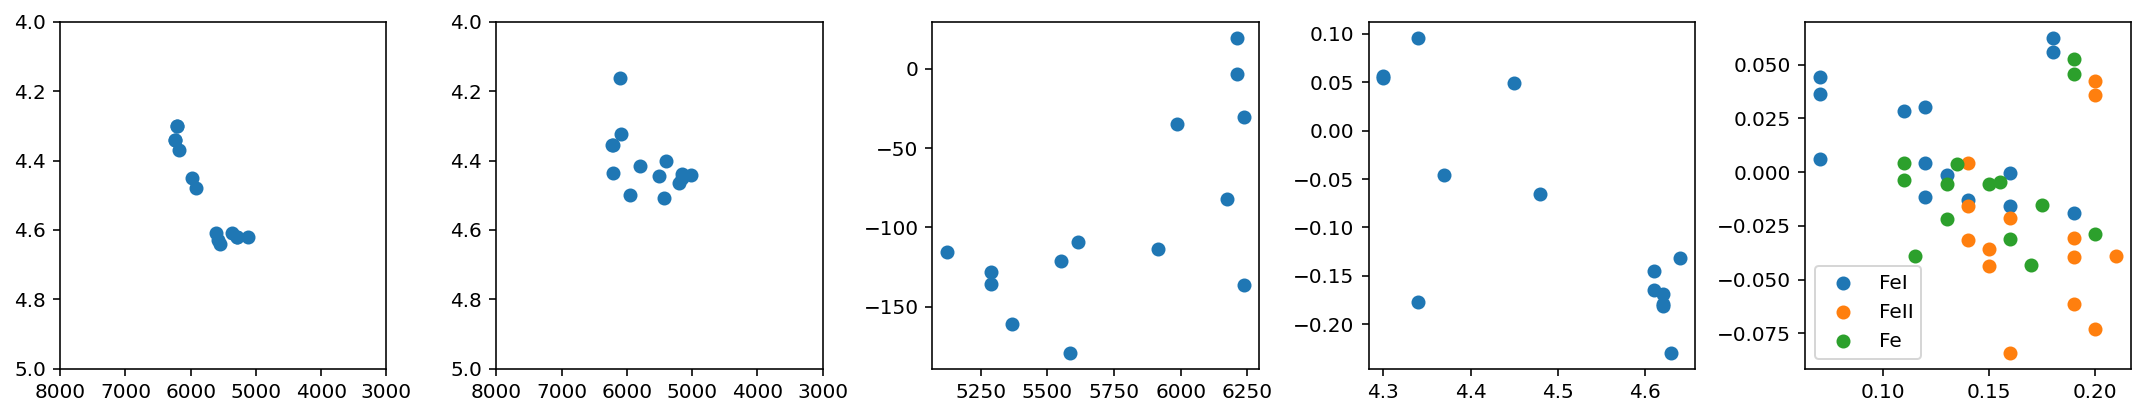

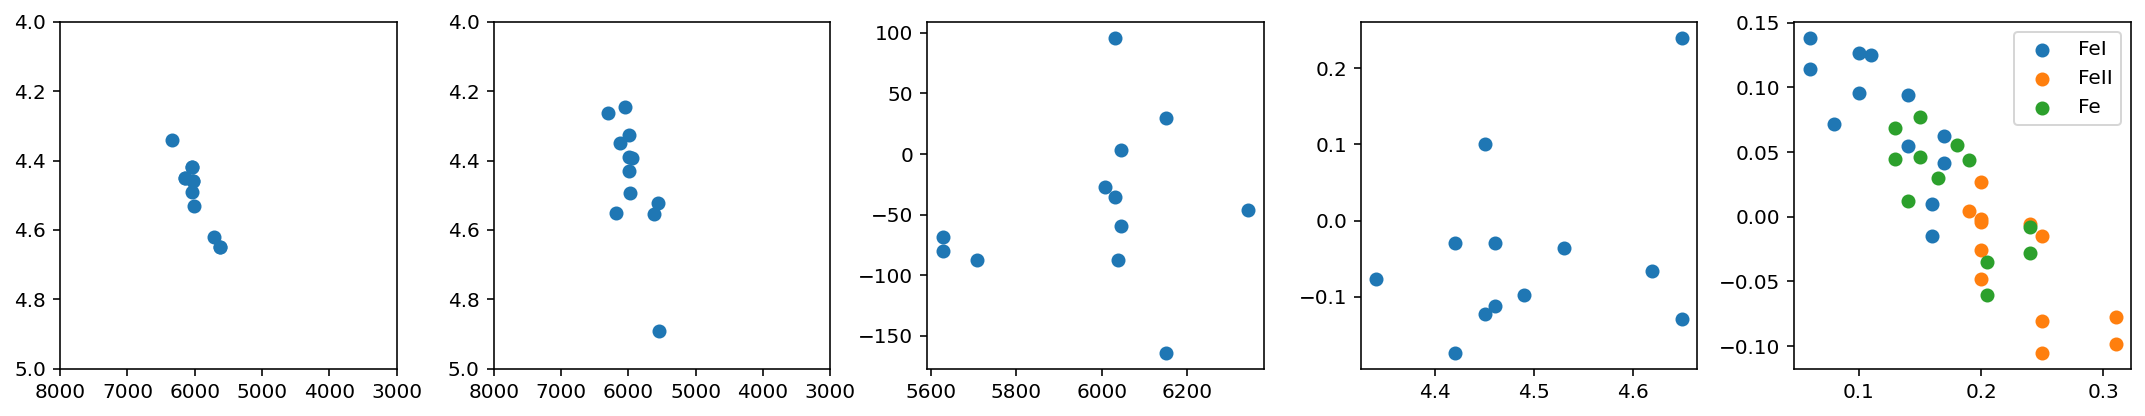

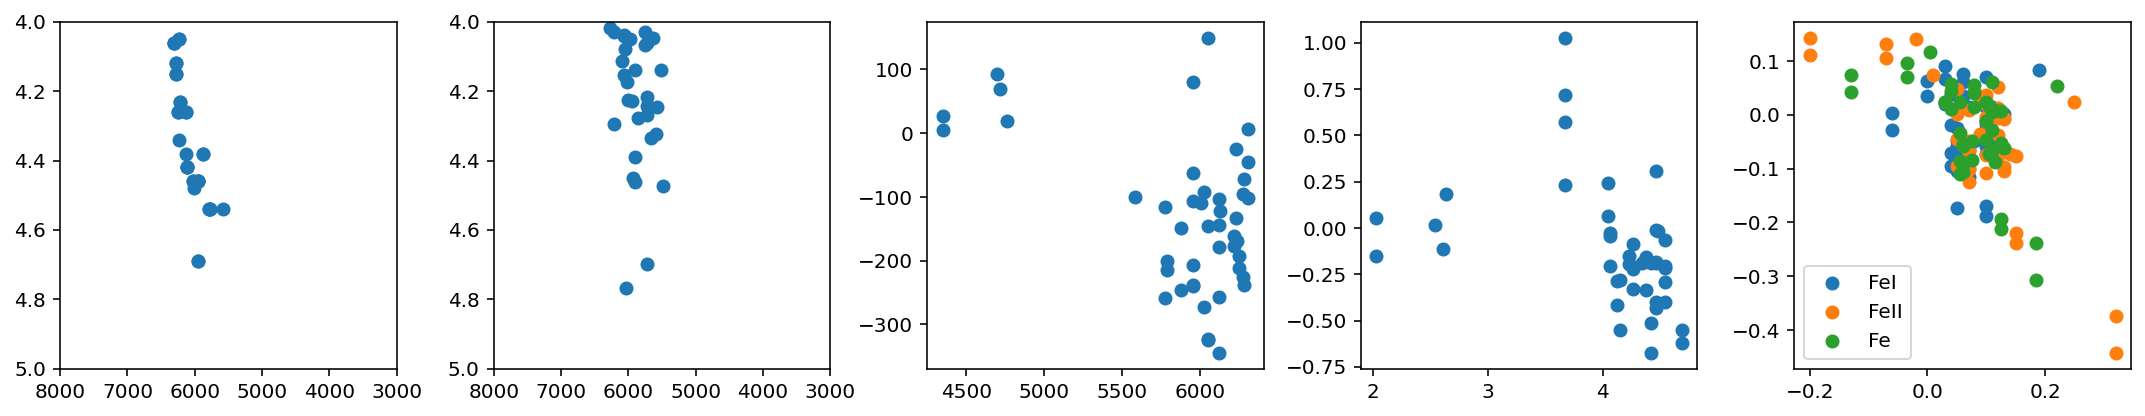

In [8]:
for cluster in np.unique(joined_c20['Cluster']):
    in_cluster = joined_c20['Cluster'] == cluster
    
    f, gs = plt.subplots(1,5,figsize=(15,3))
    ax = gs[0]
    ax.scatter(
        joined_c20['TeffS'][in_cluster],
        joined_c20['loggS'][in_cluster]
    )
    ax.set_xlim(8000,3000)
    ax.set_ylim(5,4)
    
    ax = gs[1]
    ax.scatter(
        joined_c20['teff'][in_cluster],
        joined_c20['logg'][in_cluster]
    )
    ax.set_xlim(8000,3000)
    ax.set_ylim(5,4)
    
    ax = gs[2]
    ax.scatter(
        joined_c20['TeffS'][in_cluster],
        joined_c20['teff'][in_cluster]-joined_c20['TeffS'][in_cluster]
    )
    ax = gs[3]
    ax.scatter(
        joined_c20['loggS'][in_cluster],
        joined_c20['logg'][in_cluster]-joined_c20['loggS'][in_cluster]
    )
    ax = gs[4]
    ax.scatter(
        joined_c20['__FeI_H_'][in_cluster],
        joined_c20['fe_h'][in_cluster]-joined_c20['__FeI_H_'][in_cluster],
        label='FeI'
    )
    ax.scatter(
        joined_c20['__FeII_H_'][in_cluster],
        joined_c20['fe_h'][in_cluster]-joined_c20['__FeII_H_'][in_cluster],
        label='FeII'
    )
    ax.scatter(
        0.5*(joined_c20['__FeI_H_'][in_cluster]+joined_c20['__FeII_H_'][in_cluster]),
        joined_c20['fe_h'][in_cluster]-0.5*(joined_c20['__FeI_H_'][in_cluster]+joined_c20['__FeII_H_'][in_cluster]),
        label='Fe'
    )
    ax.legend()
    
    plt.tight_layout()

In [9]:
joined[joined['Cluster'] == 'Trumpler_10      ']

<Table length=175>
   sobject_id       tmass_id      gaiadr3_source_id  ...   plx    e_plx 
                                                     ...   mas     mas  
     int64          bytes16             int64        ... float32 float32
--------------- ---------------- ------------------- ... ------- -------
220422002101067 08500984-4321321 5523891206147715712 ...   2.287   0.075
220422002101067 08500984-4321321 5523891206147715712 ...   2.287   0.075
220422002101062 08501592-4314039 5523905083181997184 ...   2.287   0.075
220422002101062 08501592-4314039 5523905083181997184 ...   2.287   0.075
220422002101068 08494270-4313238 5523907492663370112 ...   2.287   0.075
220422002101068 08494270-4313238 5523907492663370112 ...   2.287   0.075
220422002101057 08501375-4305573 5523909756105794944 ...   2.287   0.075
220422002101057 08501375-4305573 5523909756105794944 ...   2.287   0.075
220422002101038 08520245-4303020 5523921992473050368 ...   2.287   0.075
            ...              ...                 ... ...     ...     ...
220422002101276 08461403-4150519 5524989137225961984 ...   2.287   0.075
220422002101296 08472530-4147103 5524993191675013888 ...   2.287   0.075
220422002101296 08472530-4147103 5524993191675013888 ...   2.287   0.075
220422002101235 08441649-4206424 5525003259078640256 ...   2.287   0.075
220422002101235 08441649-4206424 5525003259078640256 ...   2.287   0.075
220422002101254 08445224-4153276 5525015147547741568 ...   2.287   0.075
220422002101261 08450923-4149158 5525015834742487552 ...   2.287   0.075
220422002101258 08444869-4148594 5525016384498315648 ...   2.287   0.075
220422002101280 08461360-4138137 5525039817839778048 ...   2.287   0.075
220422002101307 08481510-4131045 5525372145230881920 ...   2.287   0.075

In [10]:
unflagged = (joined['flag_sp'] == 0)
flagged = (joined['flag_sp'] > 0)

Cluster, unflagged, flagged, total
ASCC_16           12 220 194


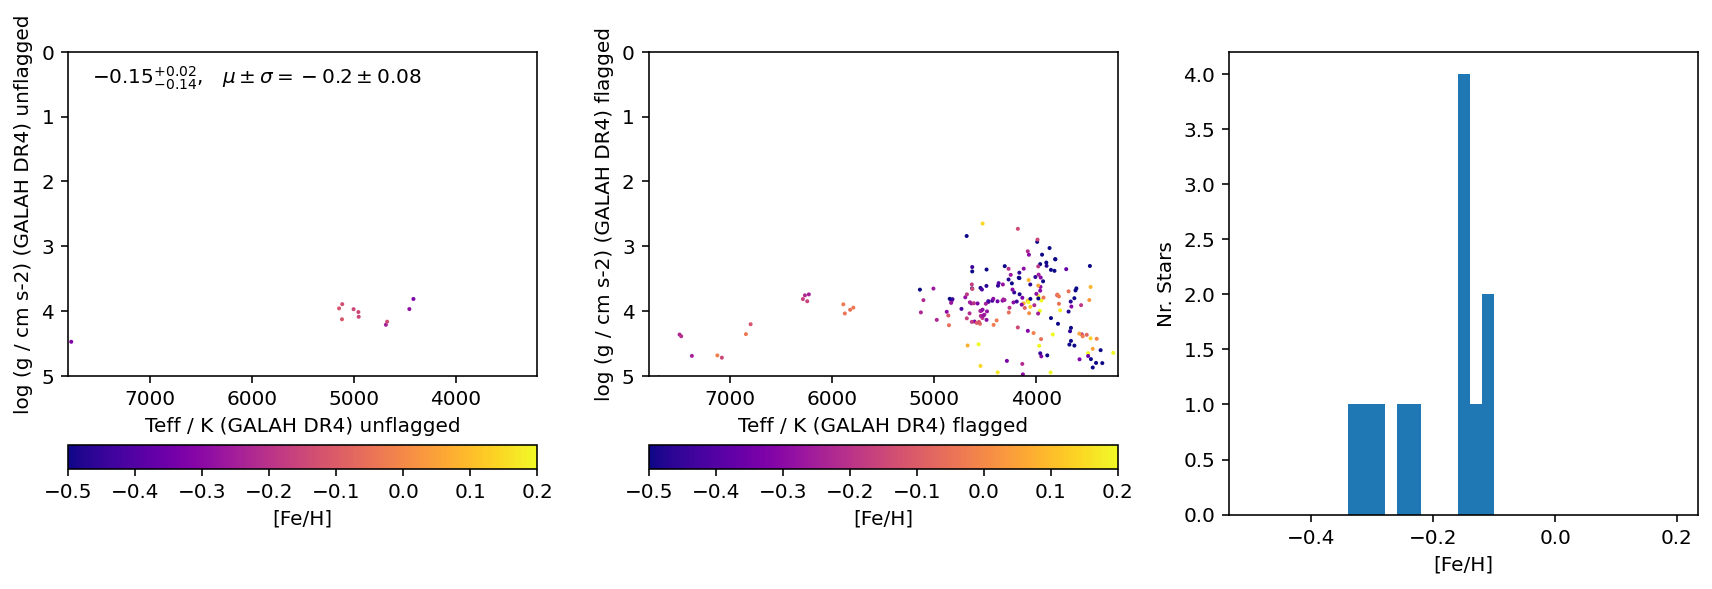

Cluster, unflagged, flagged, total
ASCC_19           1 132 79


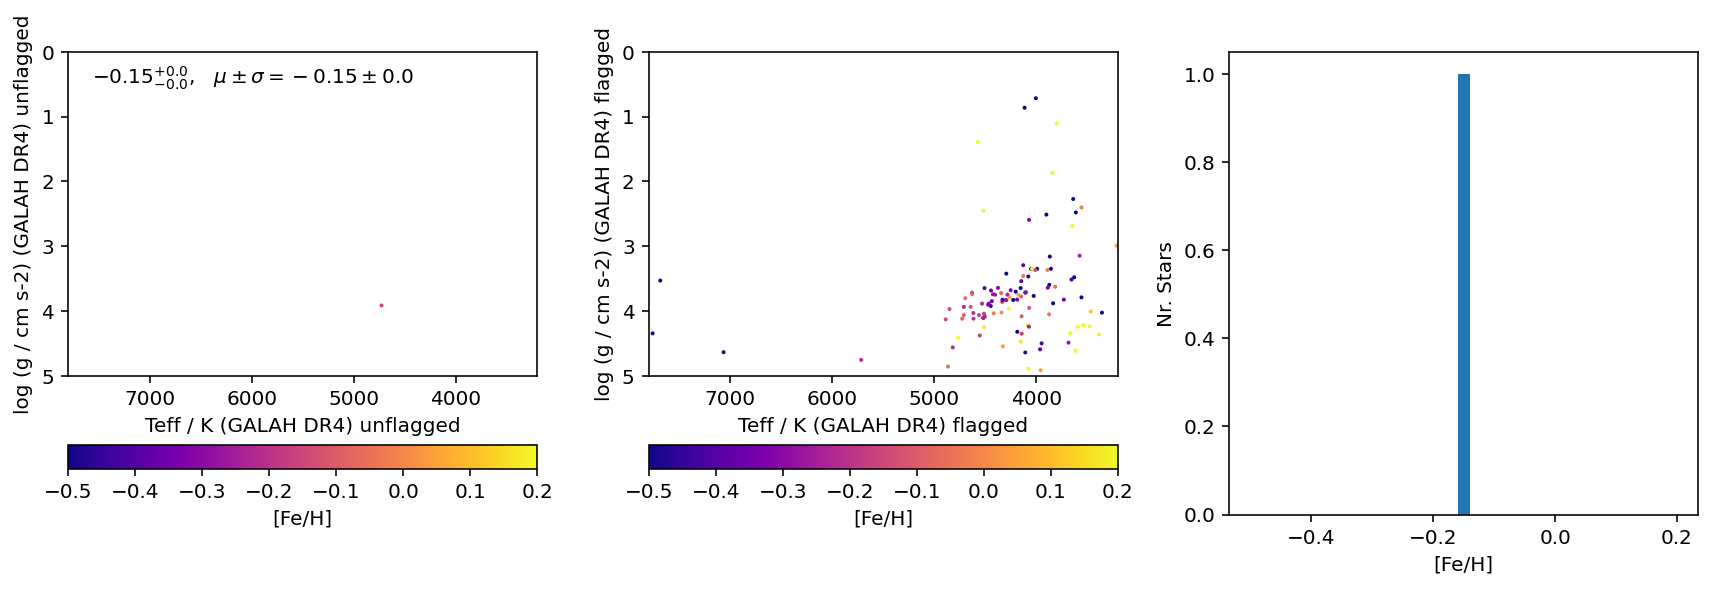

Cluster, unflagged, flagged, total
Alessi_24         3 4 19


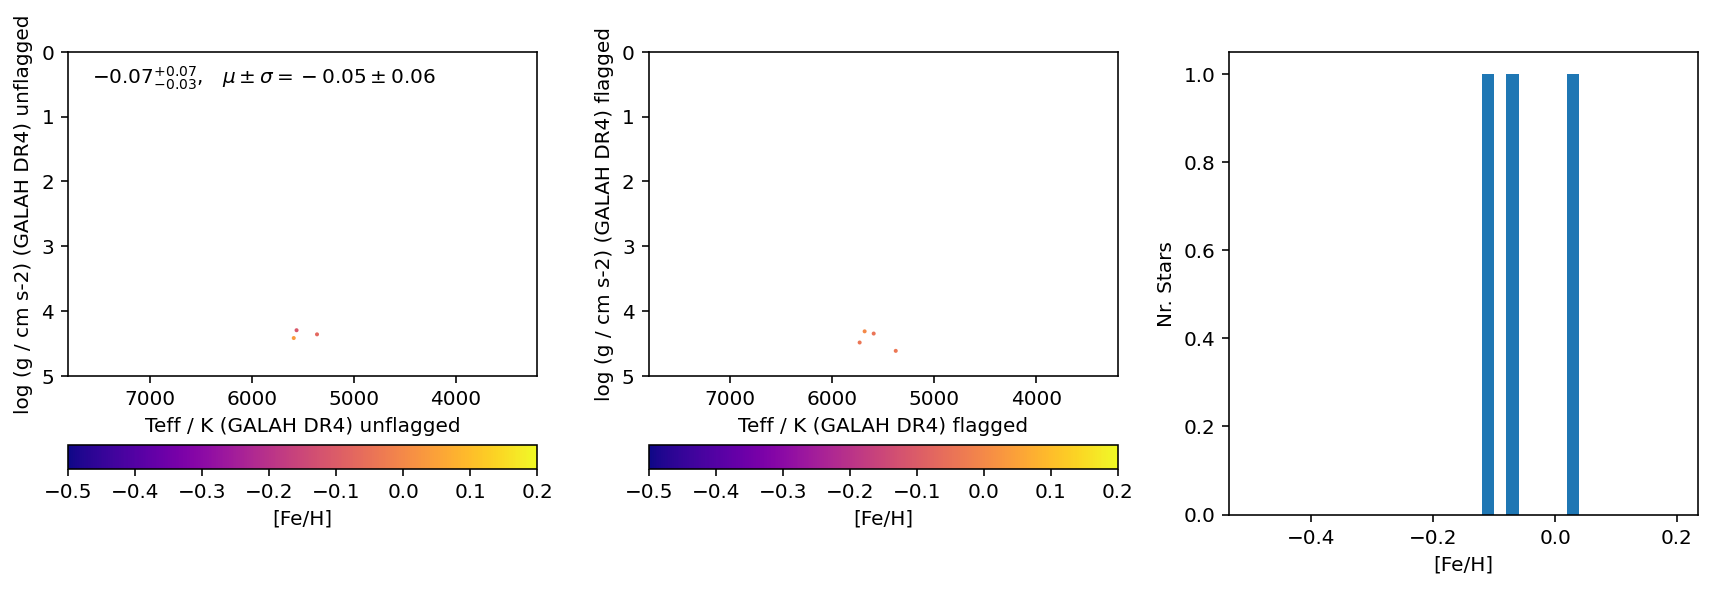

Cluster, unflagged, flagged, total
Alessi_9          1 0 5
Cluster, unflagged, flagged, total
Berkeley_73       1 8 18


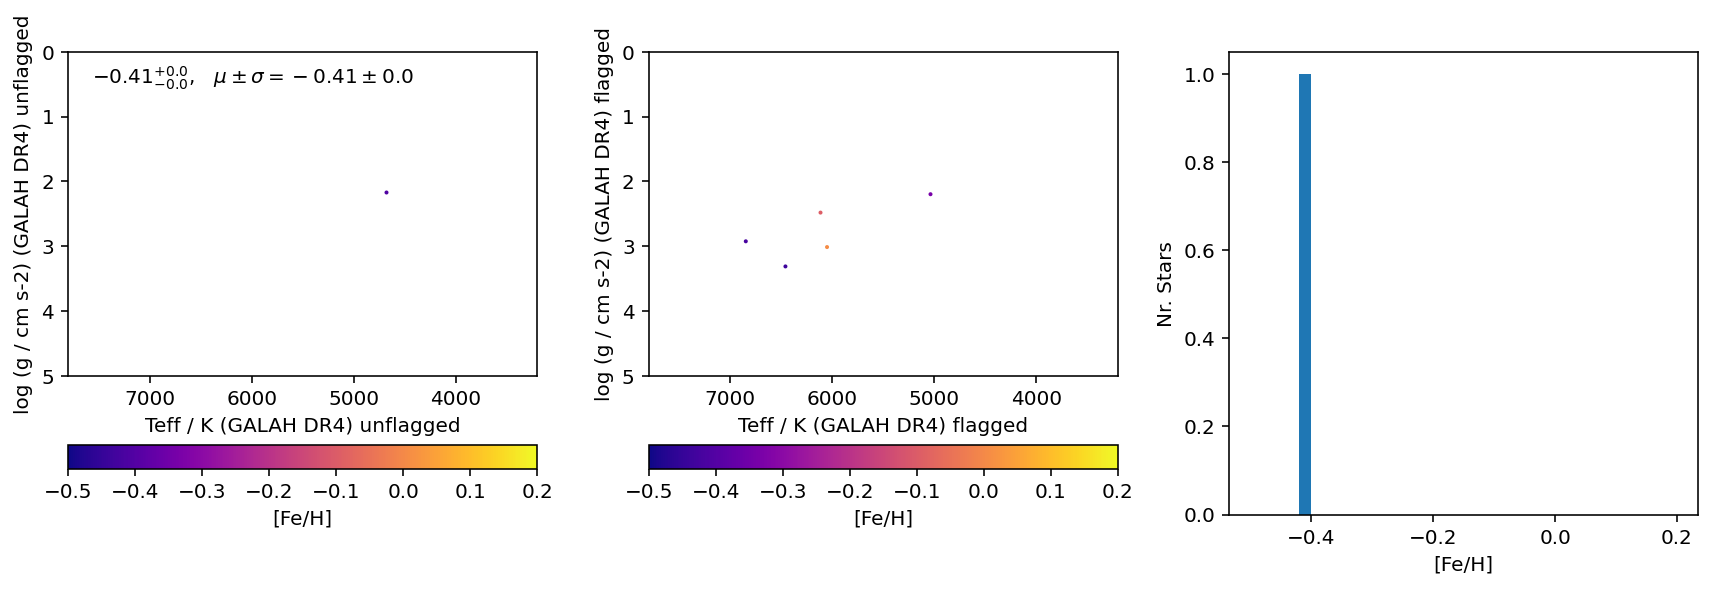

Cluster, unflagged, flagged, total
Blanco_1          82 61 114


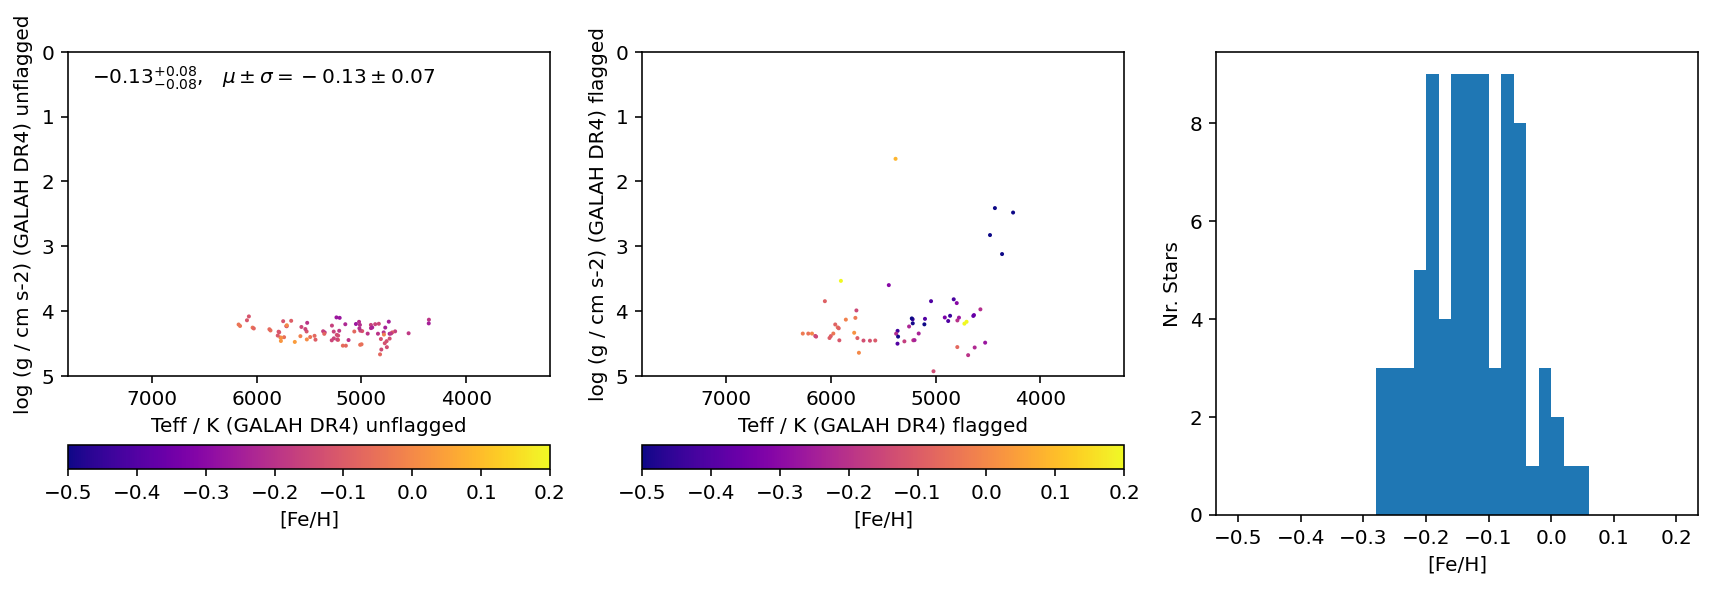

Cluster, unflagged, flagged, total
Collinder_135     23 51 48


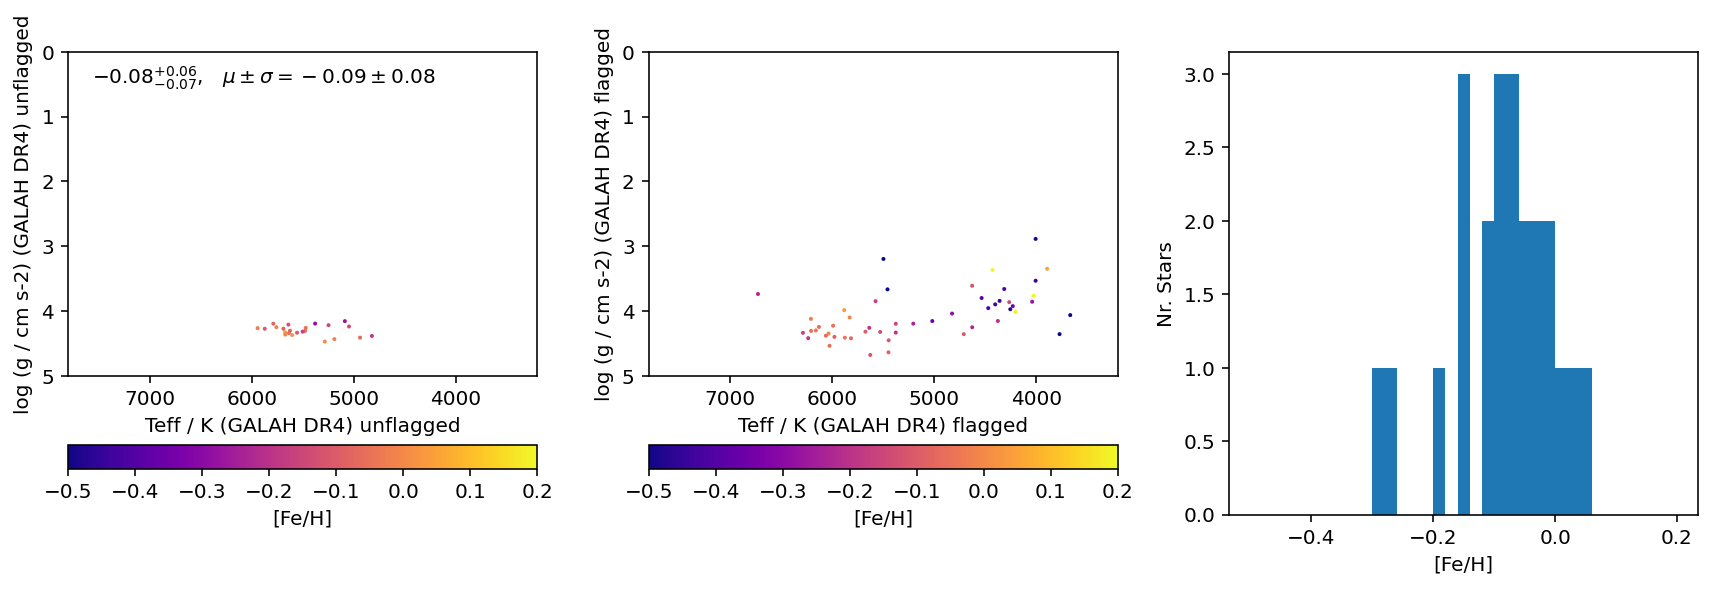

Cluster, unflagged, flagged, total
Collinder_140     1 1 1
Cluster, unflagged, flagged, total
Collinder_261     88 519 423


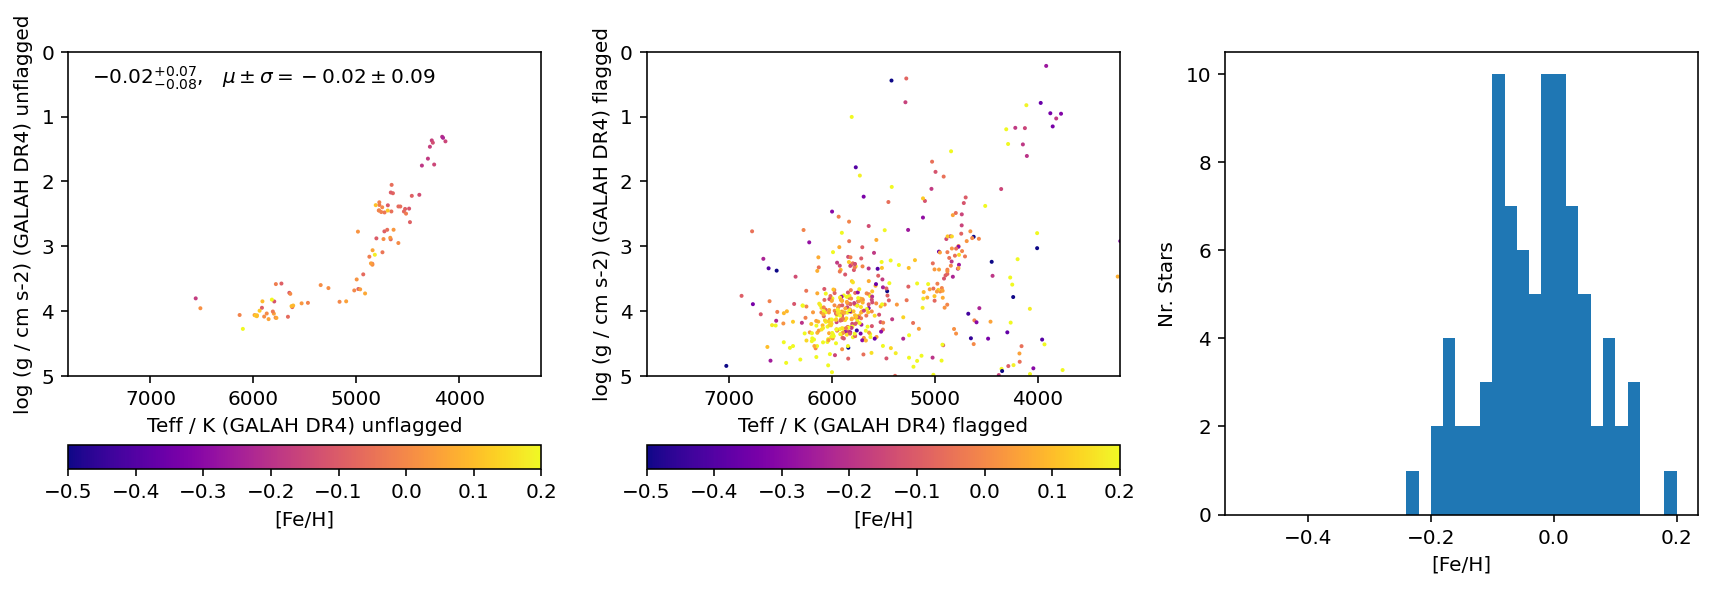

Cluster, unflagged, flagged, total
Collinder_359     1 4 11


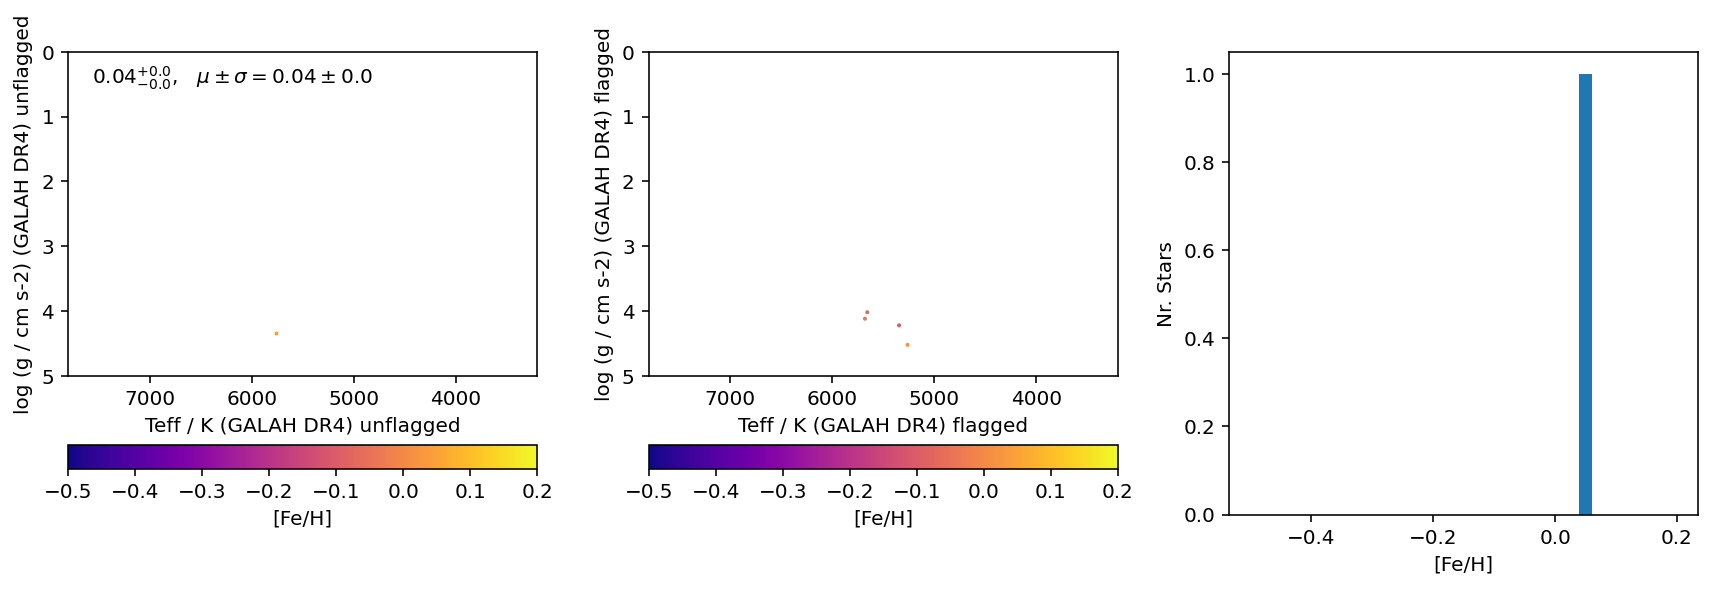

Cluster, unflagged, flagged, total
Collinder_69      9 126 205


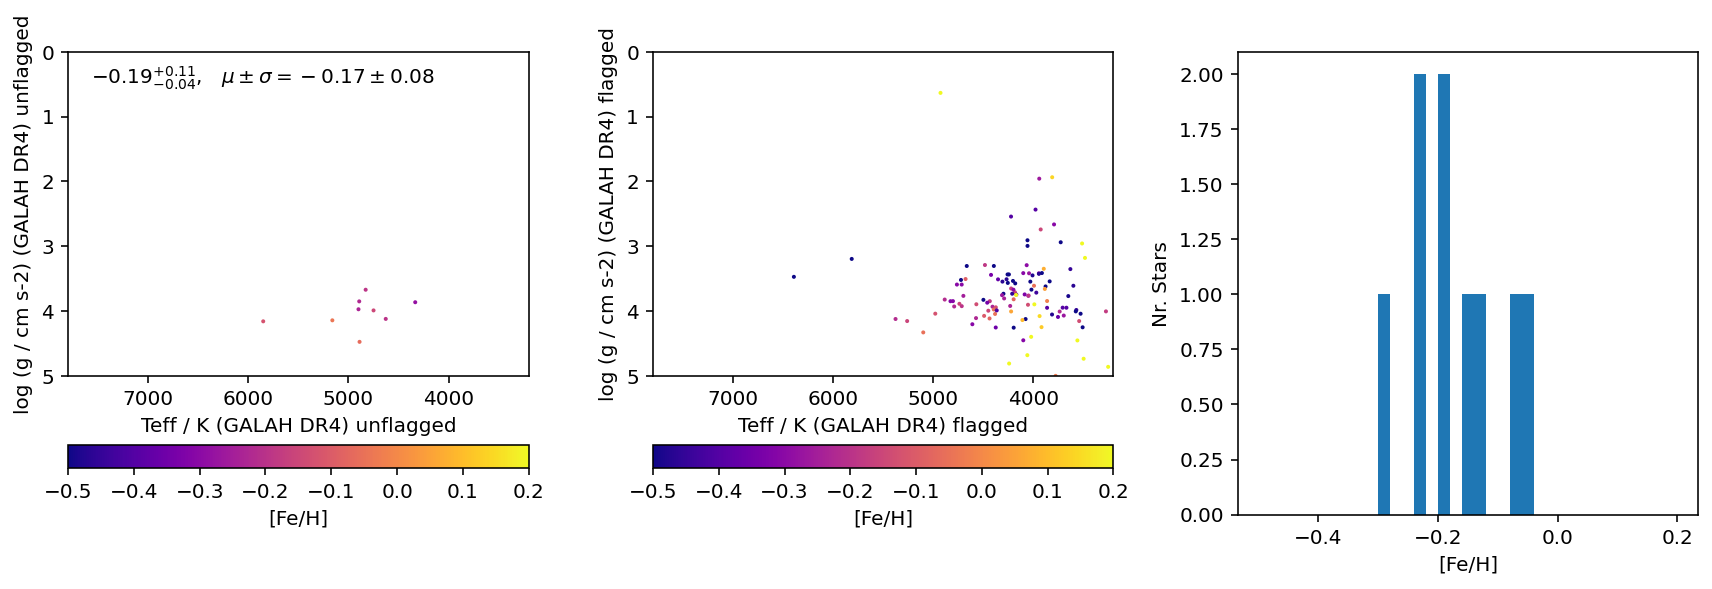

Cluster, unflagged, flagged, total
Collinder_74      3 3 6
Cluster, unflagged, flagged, total
FSR_1252          1 1 2
Cluster, unflagged, flagged, total
FSR_1253          1 11 6
Cluster, unflagged, flagged, total
Ferrero_11        2 1 2
Cluster, unflagged, flagged, total
Gulliver_6        8 218 130


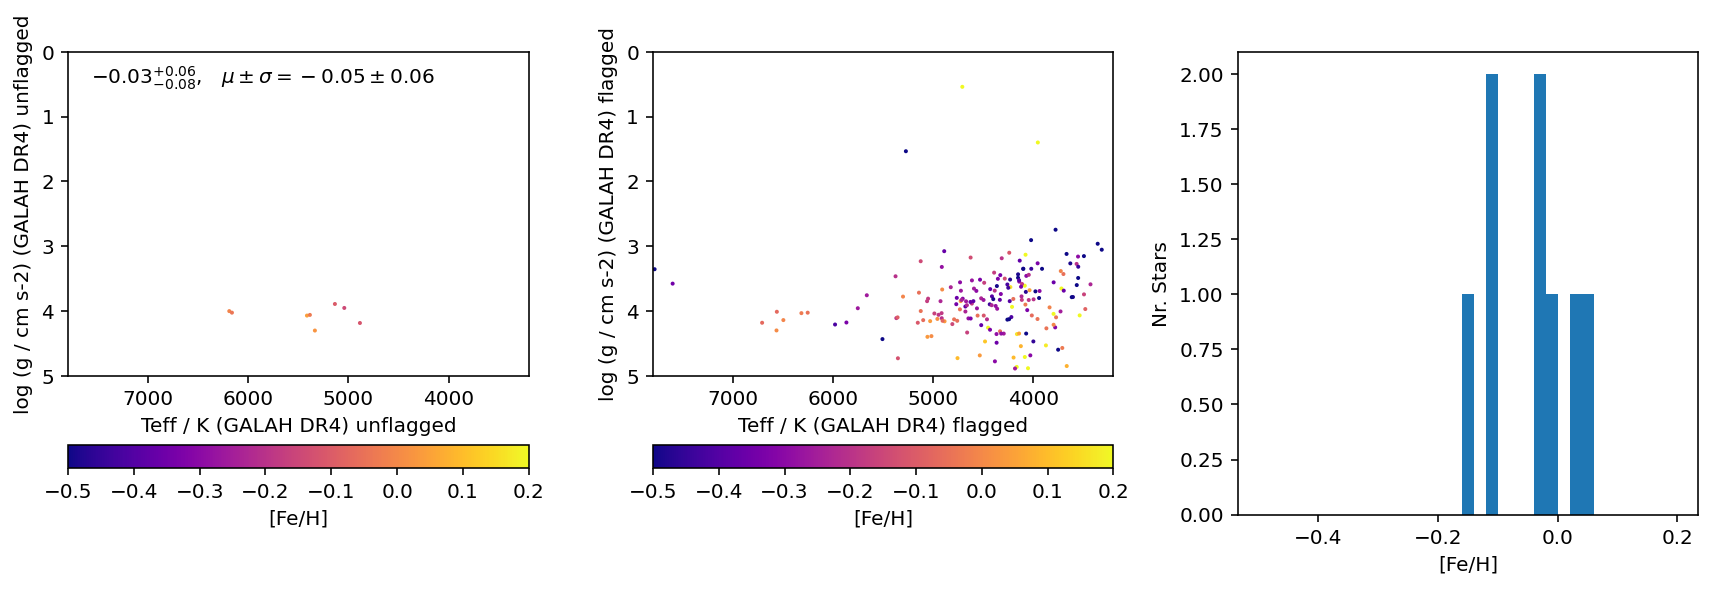

Cluster, unflagged, flagged, total
Gulliver_9        2 4 3
Cluster, unflagged, flagged, total
IC_2391           8 43 31


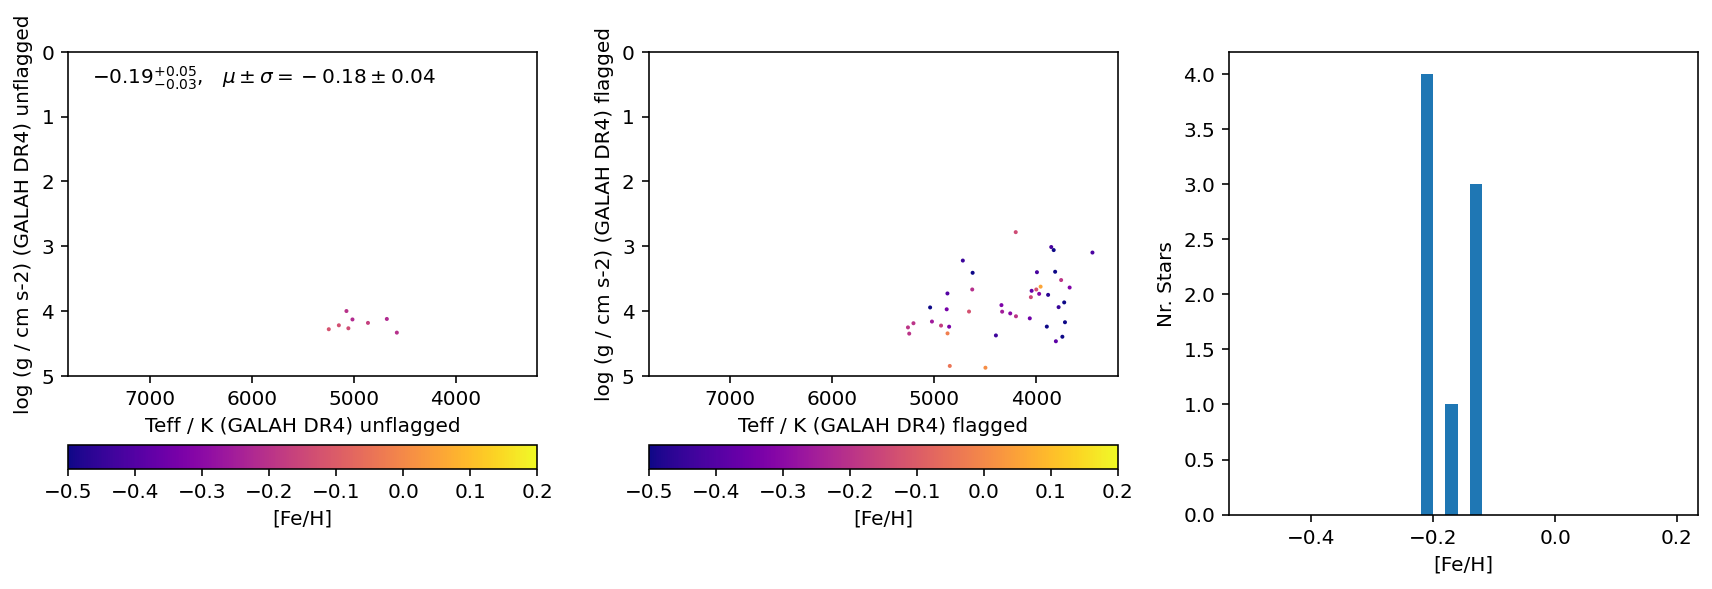

Cluster, unflagged, flagged, total
LP_2117           3 34 22


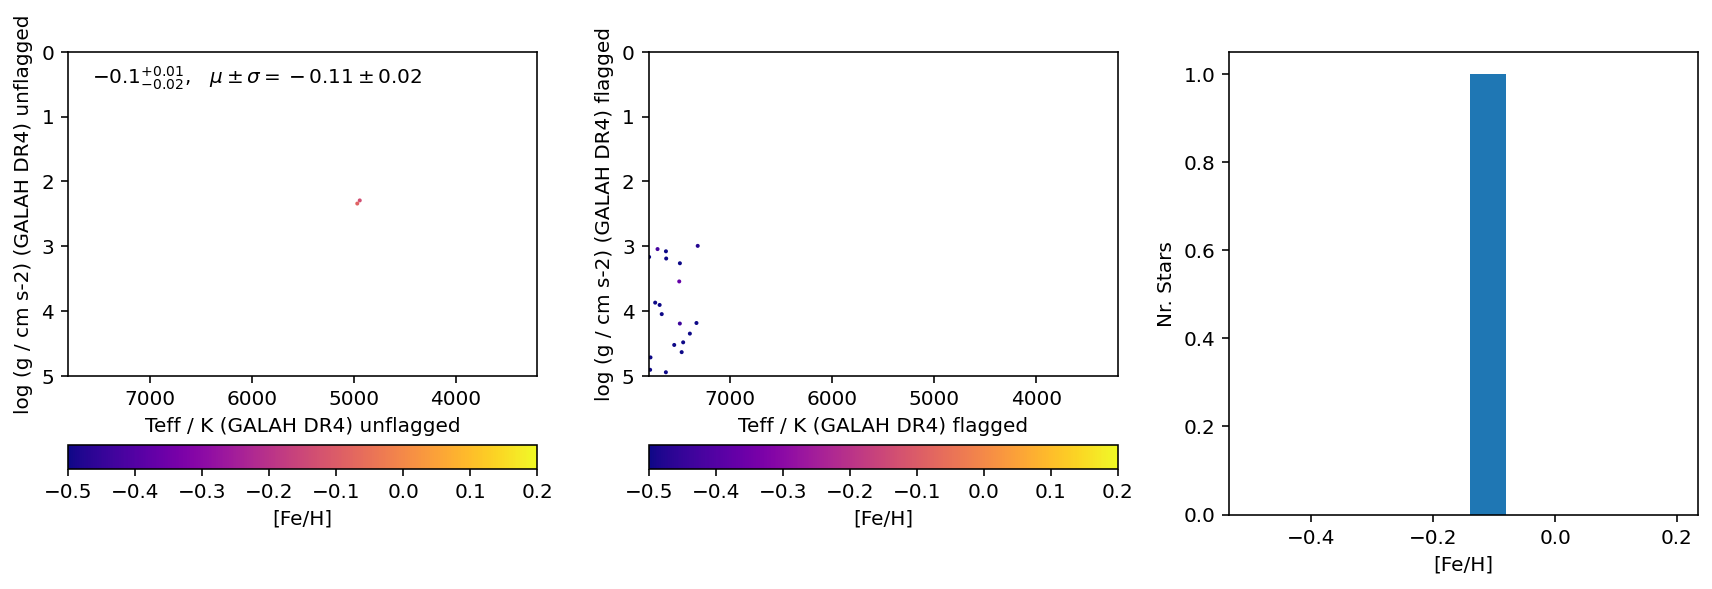

Cluster, unflagged, flagged, total
LP_5              2 1 2
Cluster, unflagged, flagged, total
Mamajek_4         10 2 16


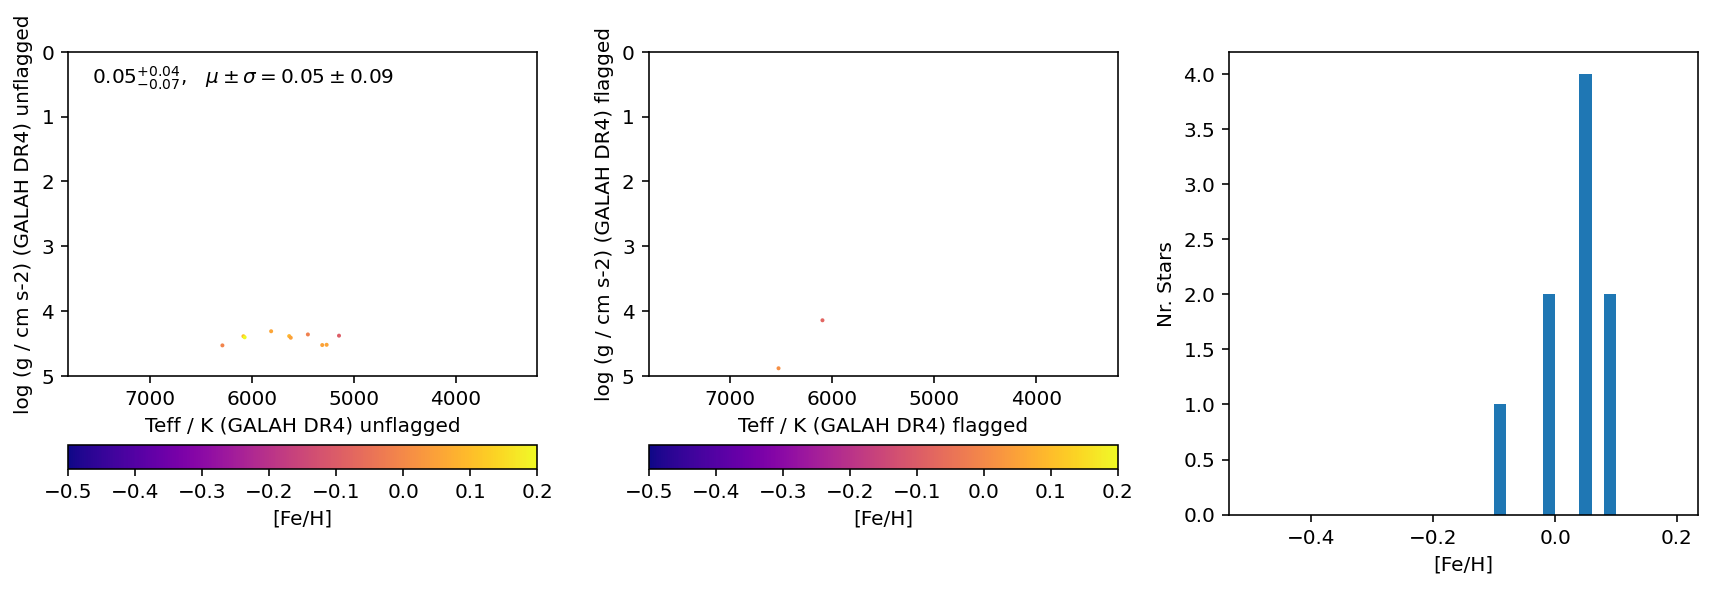

Cluster, unflagged, flagged, total
Melotte_22        39 127 105


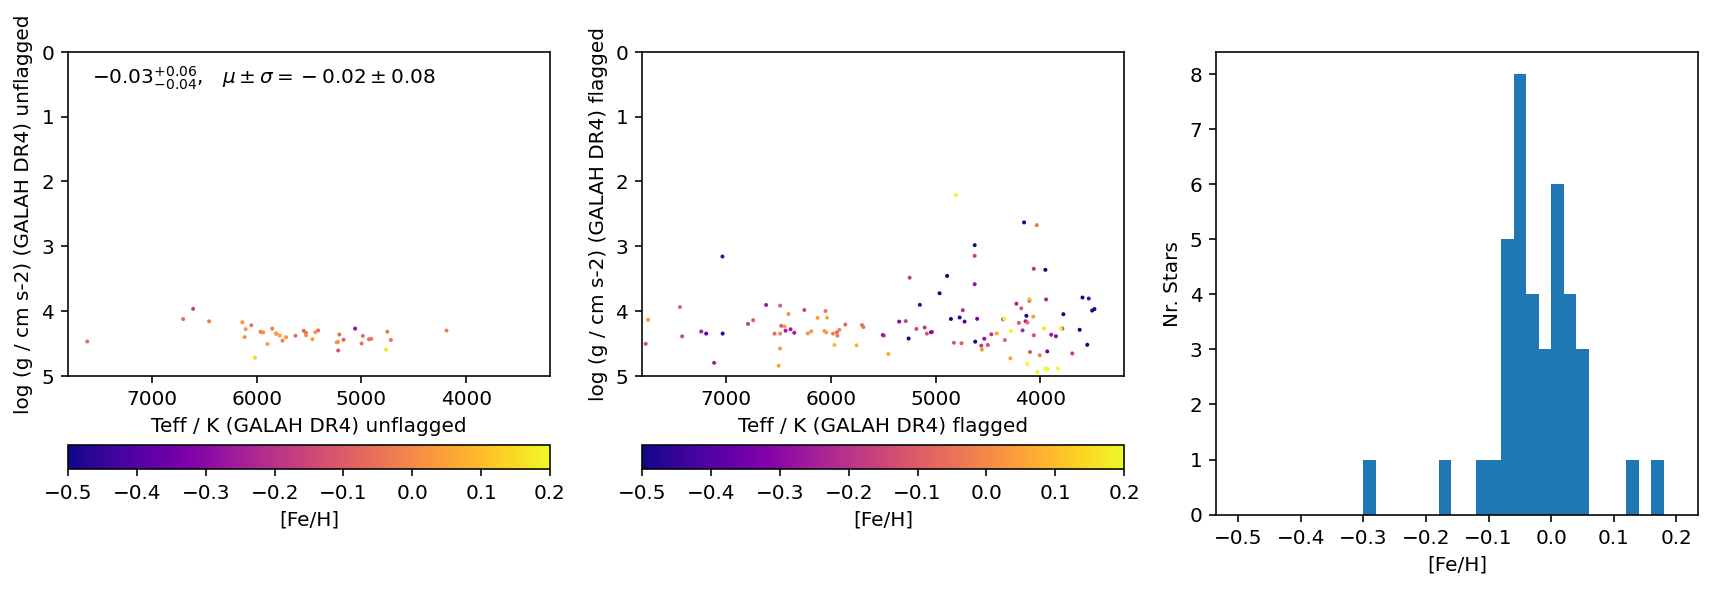

Cluster, unflagged, flagged, total
Melotte_25        4 89 97


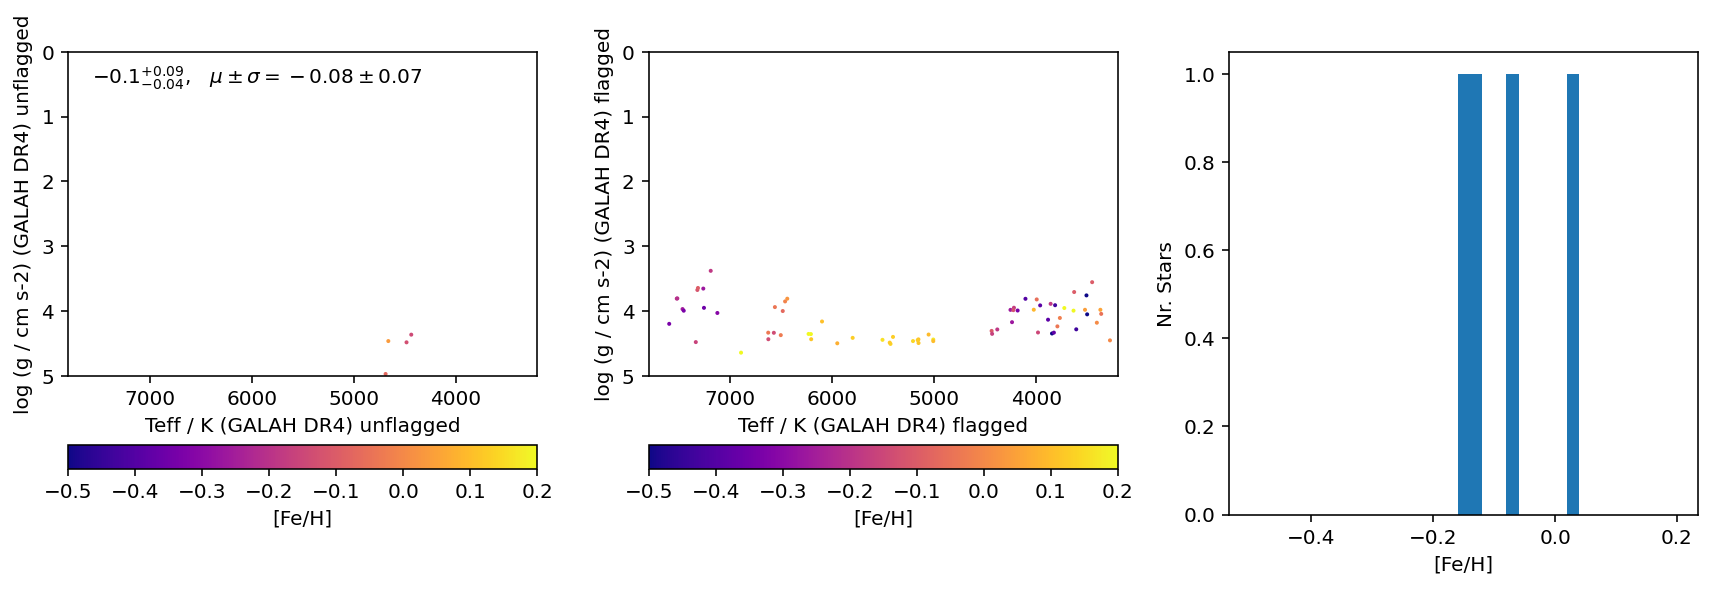

Cluster, unflagged, flagged, total
NGC_1647          2 3 8
Cluster, unflagged, flagged, total
NGC_1817          27 6 33


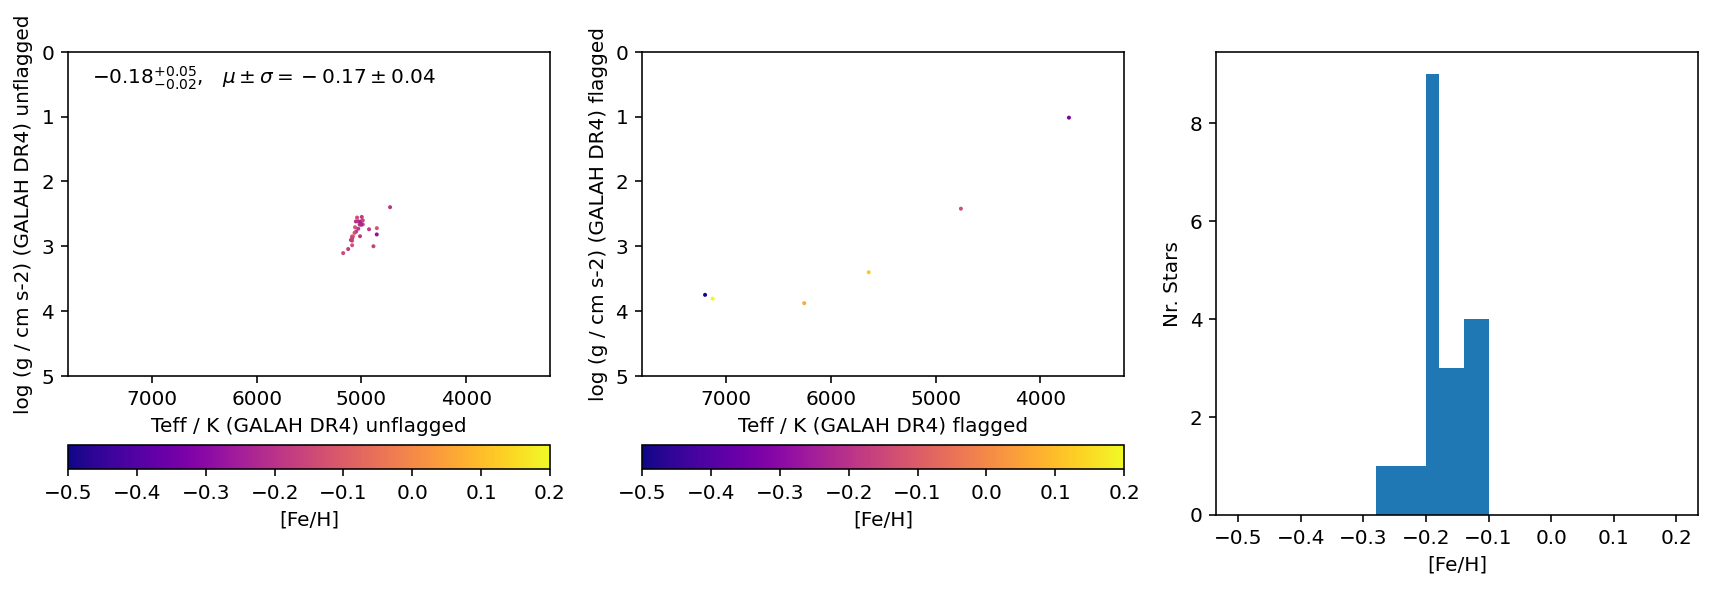

Cluster, unflagged, flagged, total
NGC_1901          2 19 21


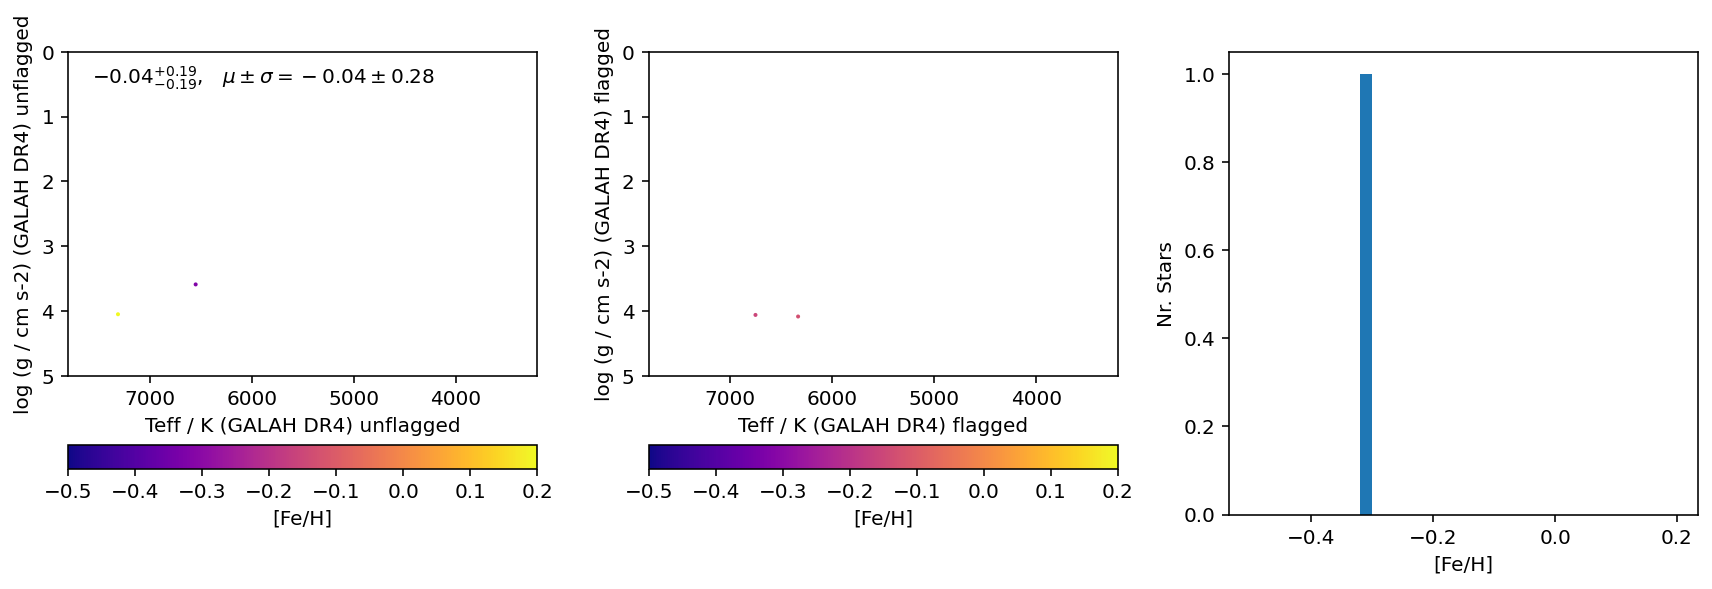

Cluster, unflagged, flagged, total
NGC_1980          3 45 24


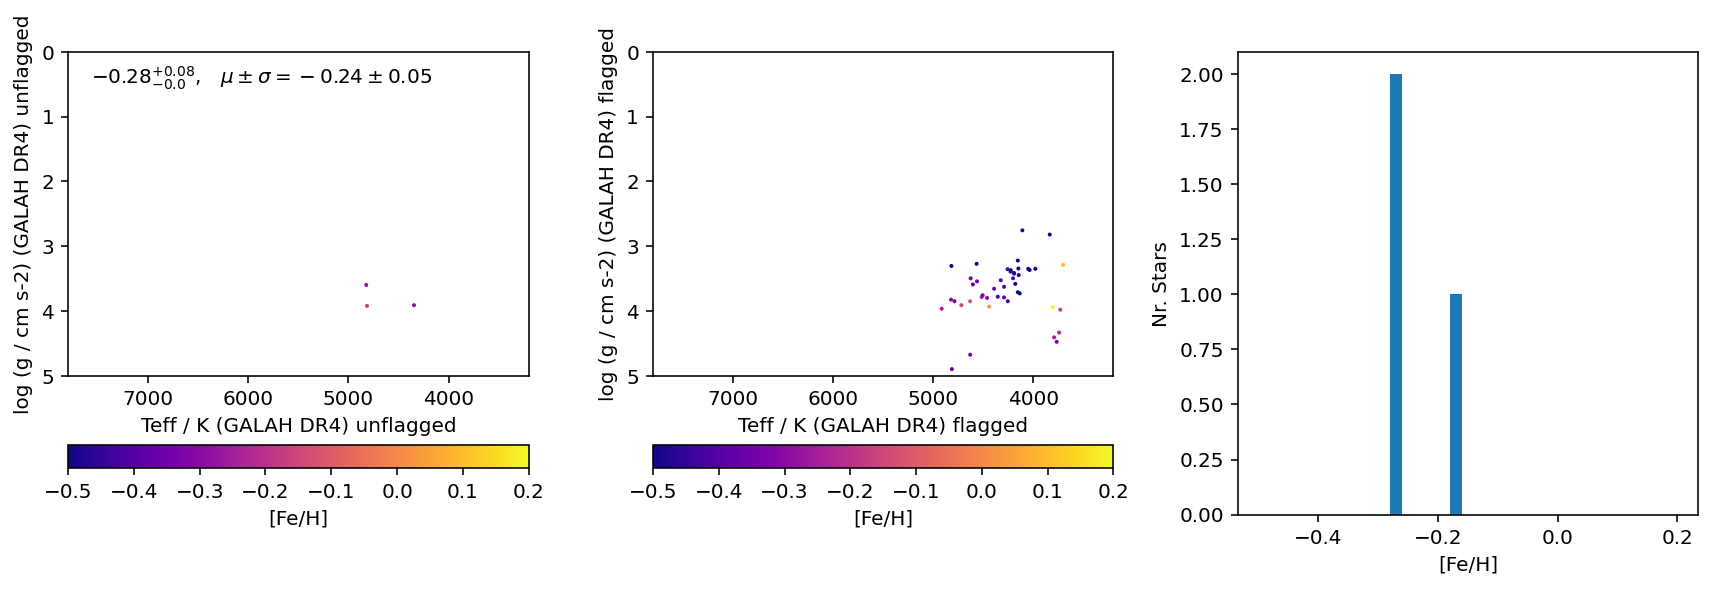

Cluster, unflagged, flagged, total
NGC_2112          26 108 82


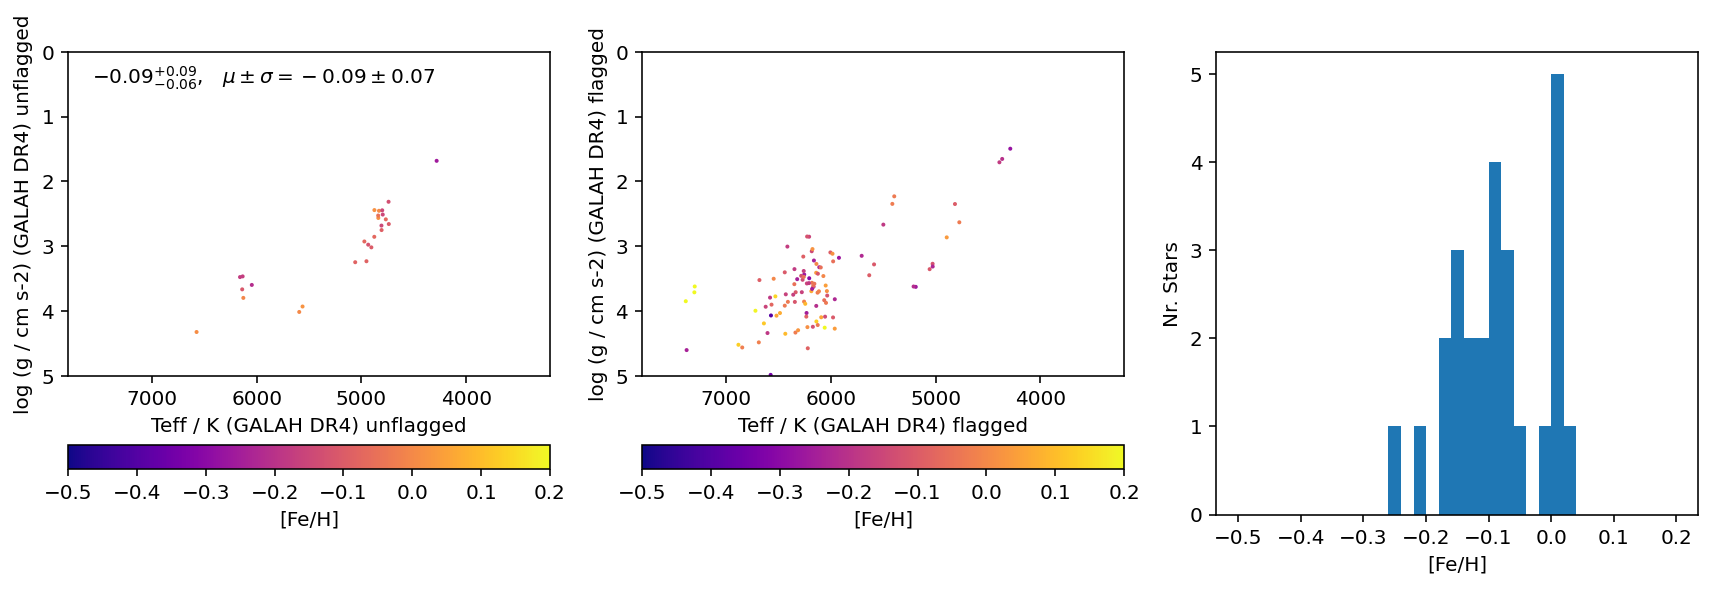

Cluster, unflagged, flagged, total
NGC_2215          1 0 3
Cluster, unflagged, flagged, total
NGC_2225          2 2 2
Cluster, unflagged, flagged, total
NGC_2243          6 5 11


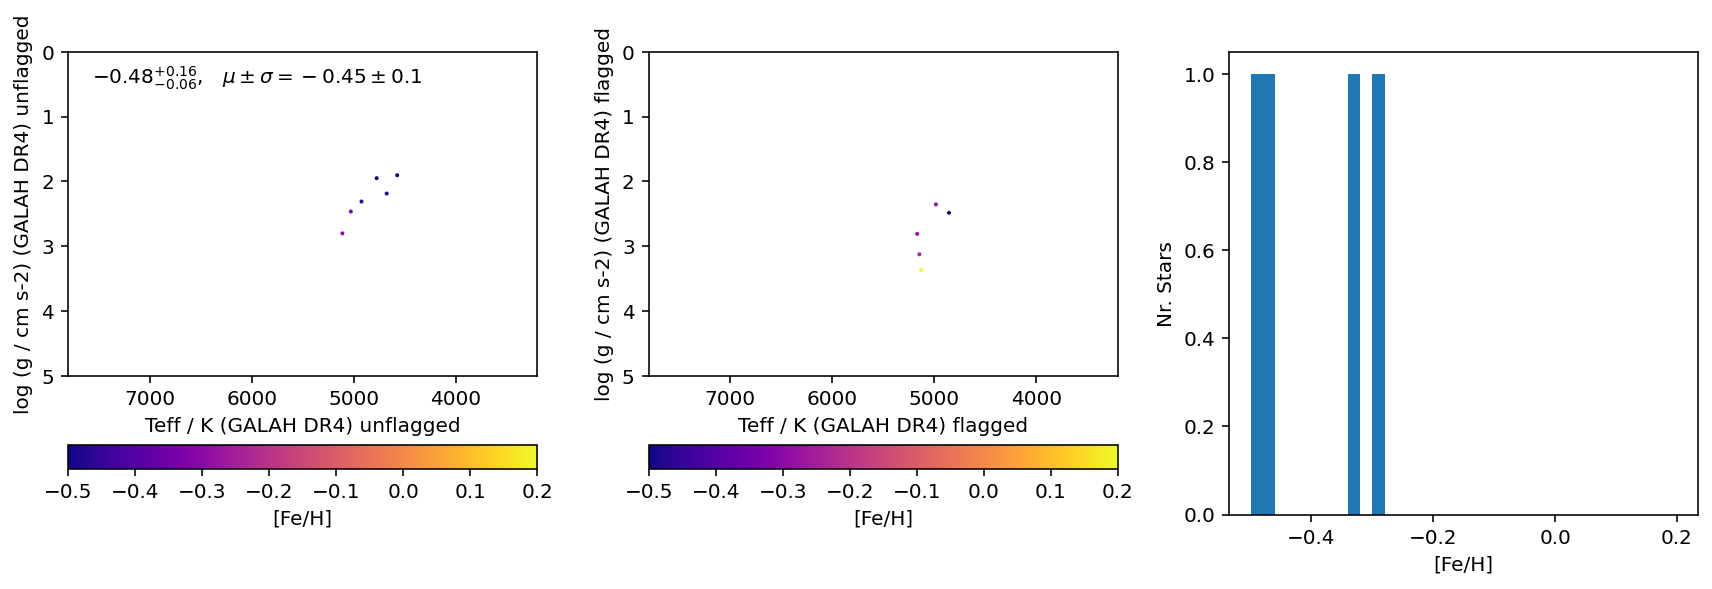

Cluster, unflagged, flagged, total
NGC_2287          1 4 3
Cluster, unflagged, flagged, total
NGC_2516          26 175 138


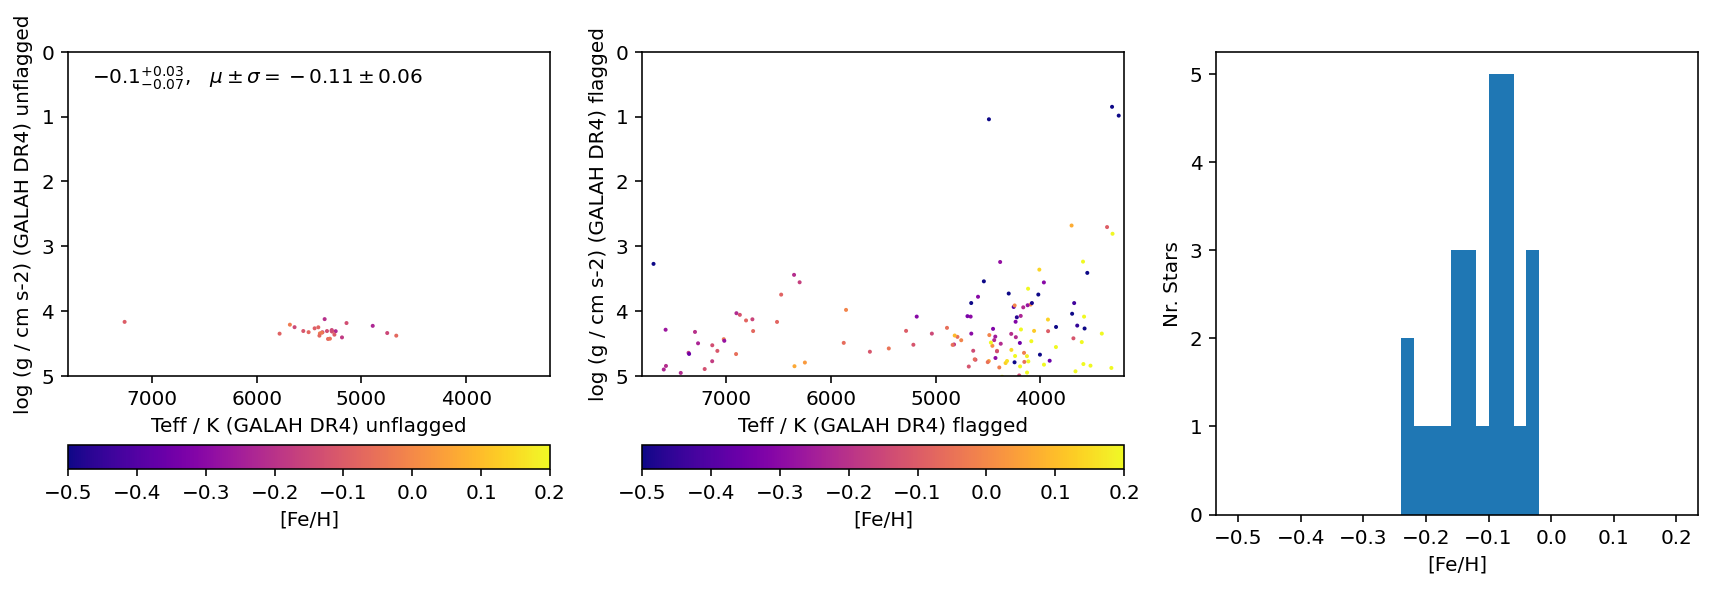

Cluster, unflagged, flagged, total
NGC_2539          5 20 18


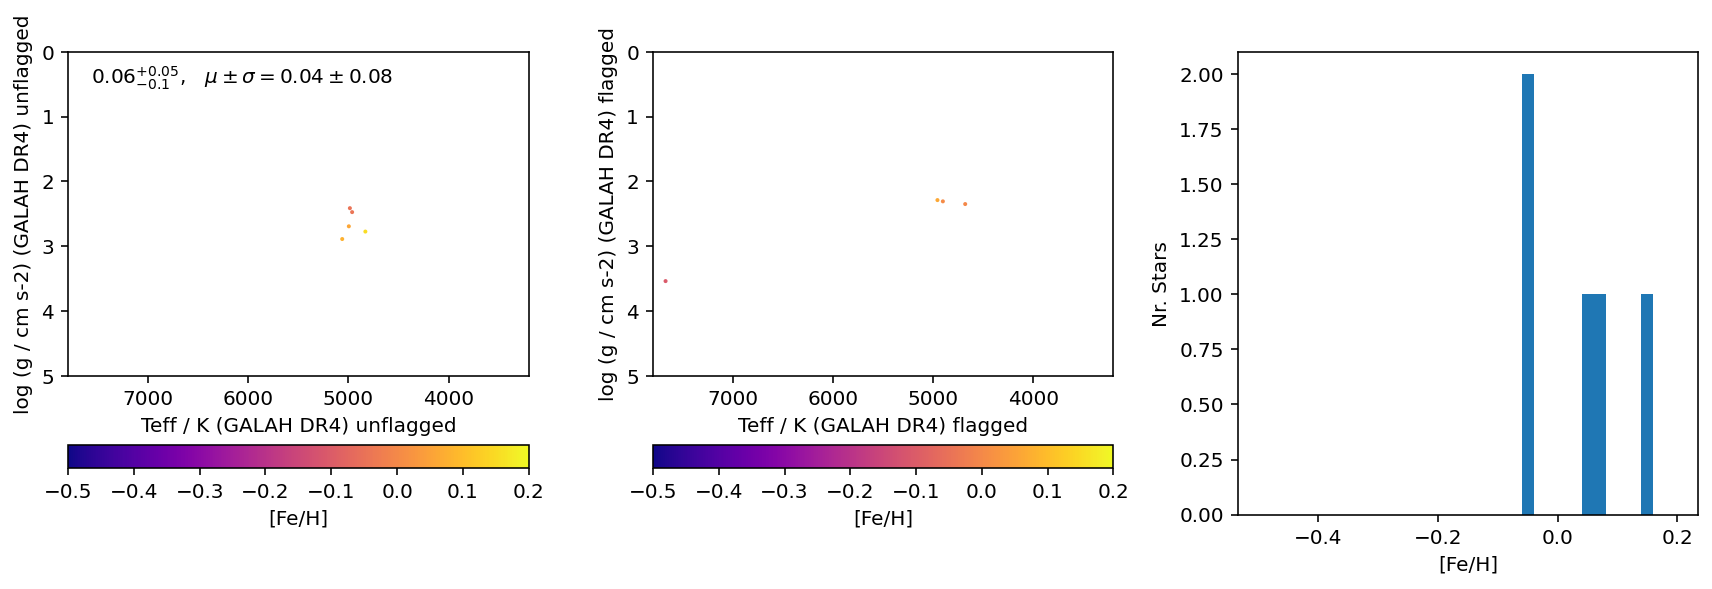

Cluster, unflagged, flagged, total
NGC_2632          81 90 127


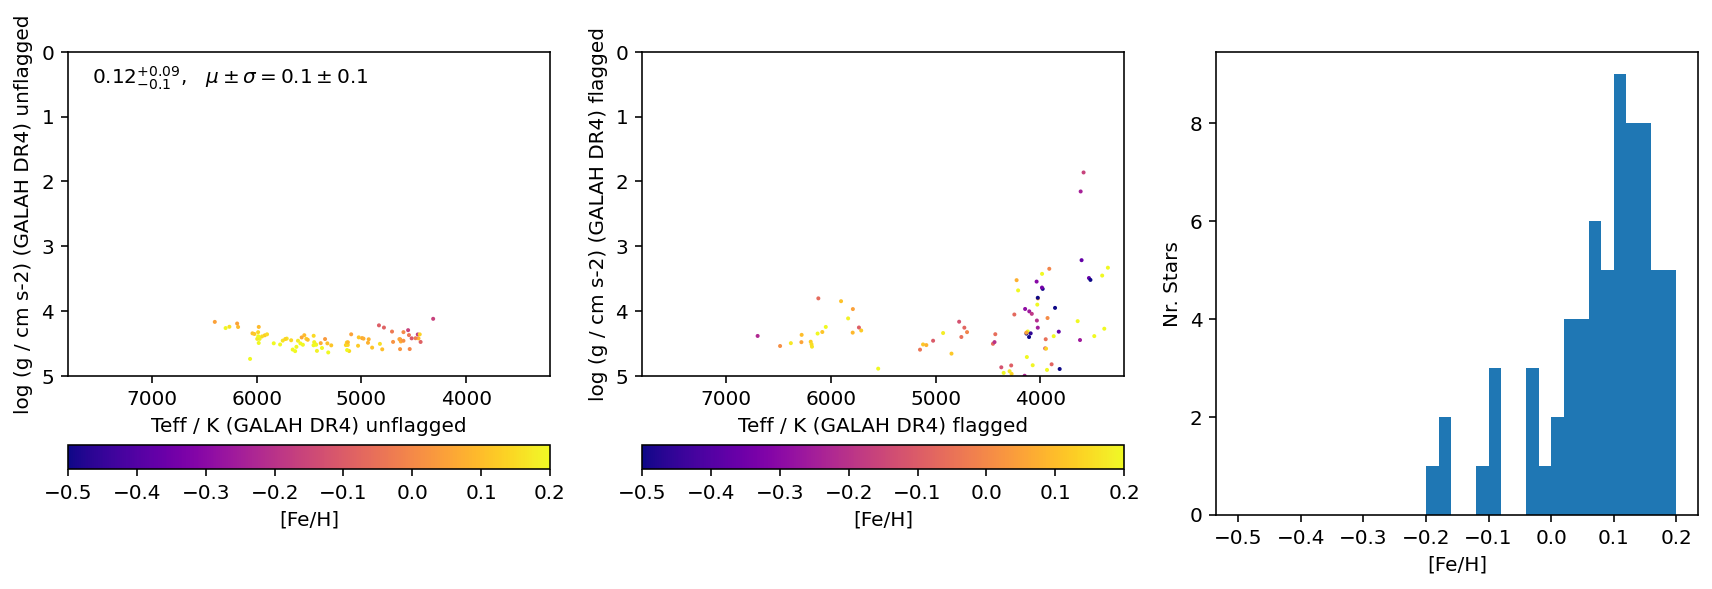

Cluster, unflagged, flagged, total
NGC_2682          526 429 754


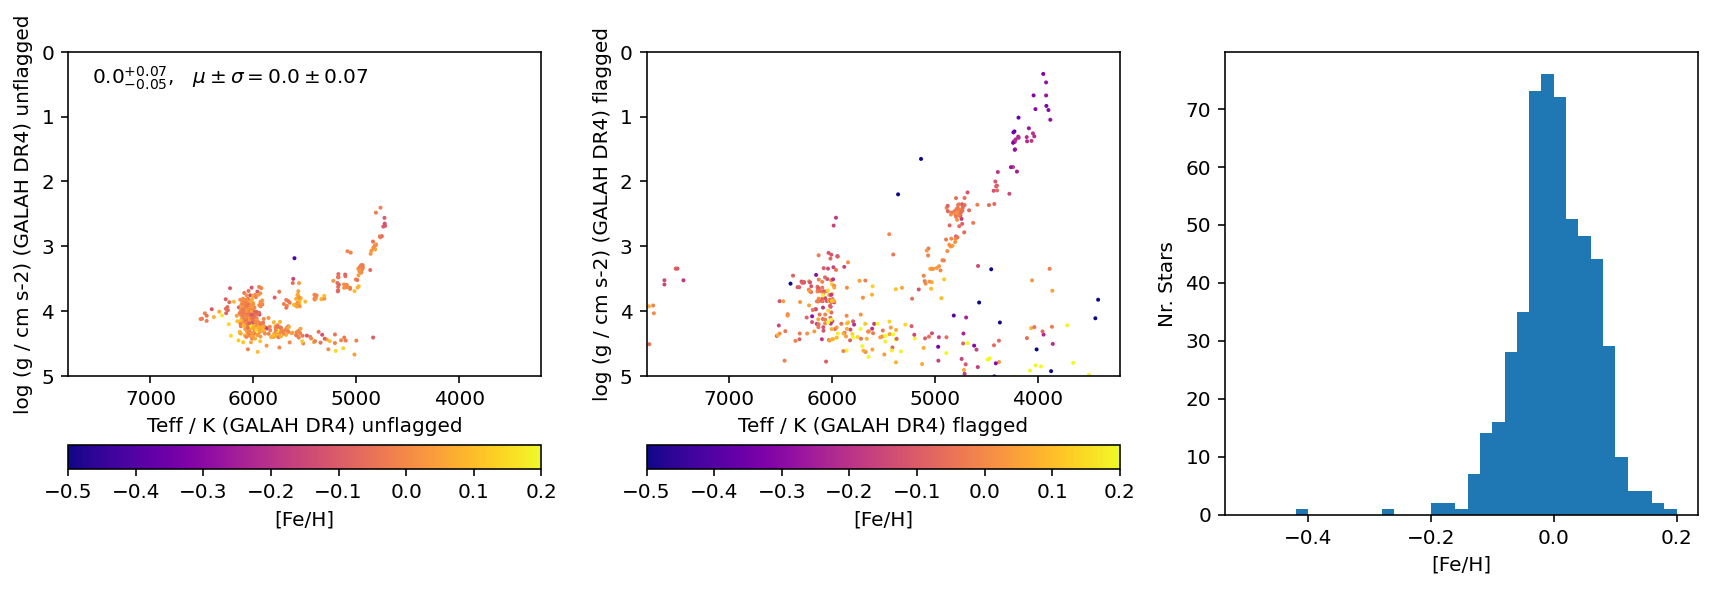

Cluster, unflagged, flagged, total
NGC_3114          2 30 20


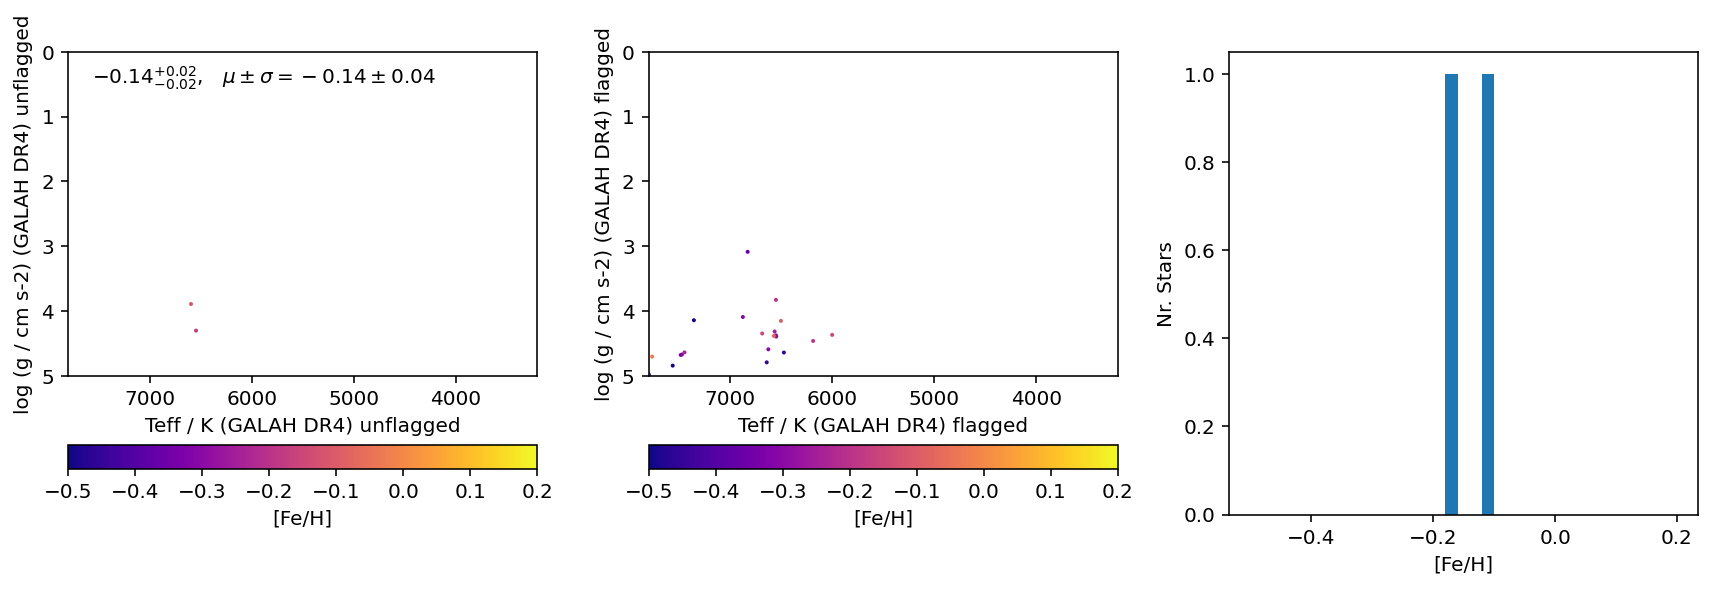

Cluster, unflagged, flagged, total
NGC_6253          37 38 59


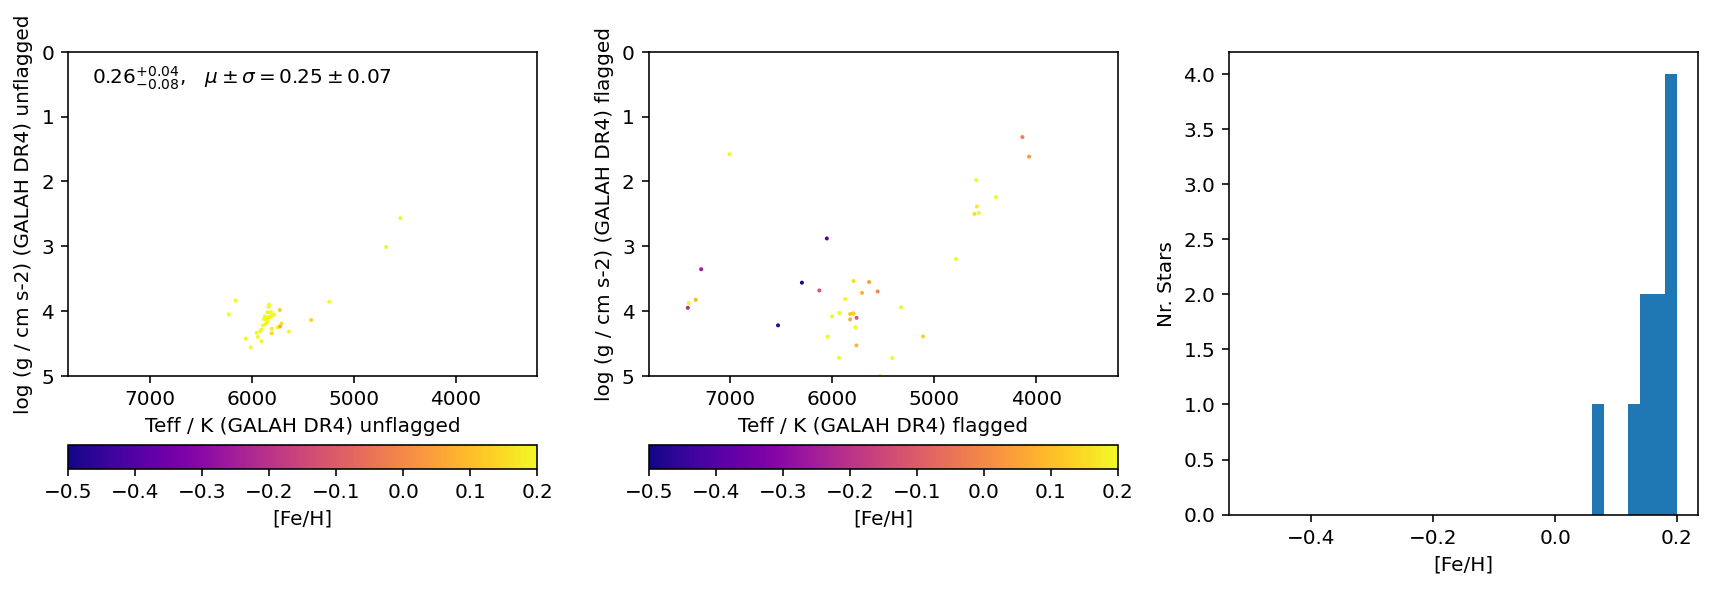

Cluster, unflagged, flagged, total
NGC_6475          1 1 1
Cluster, unflagged, flagged, total
Ruprecht_147      85 60 156


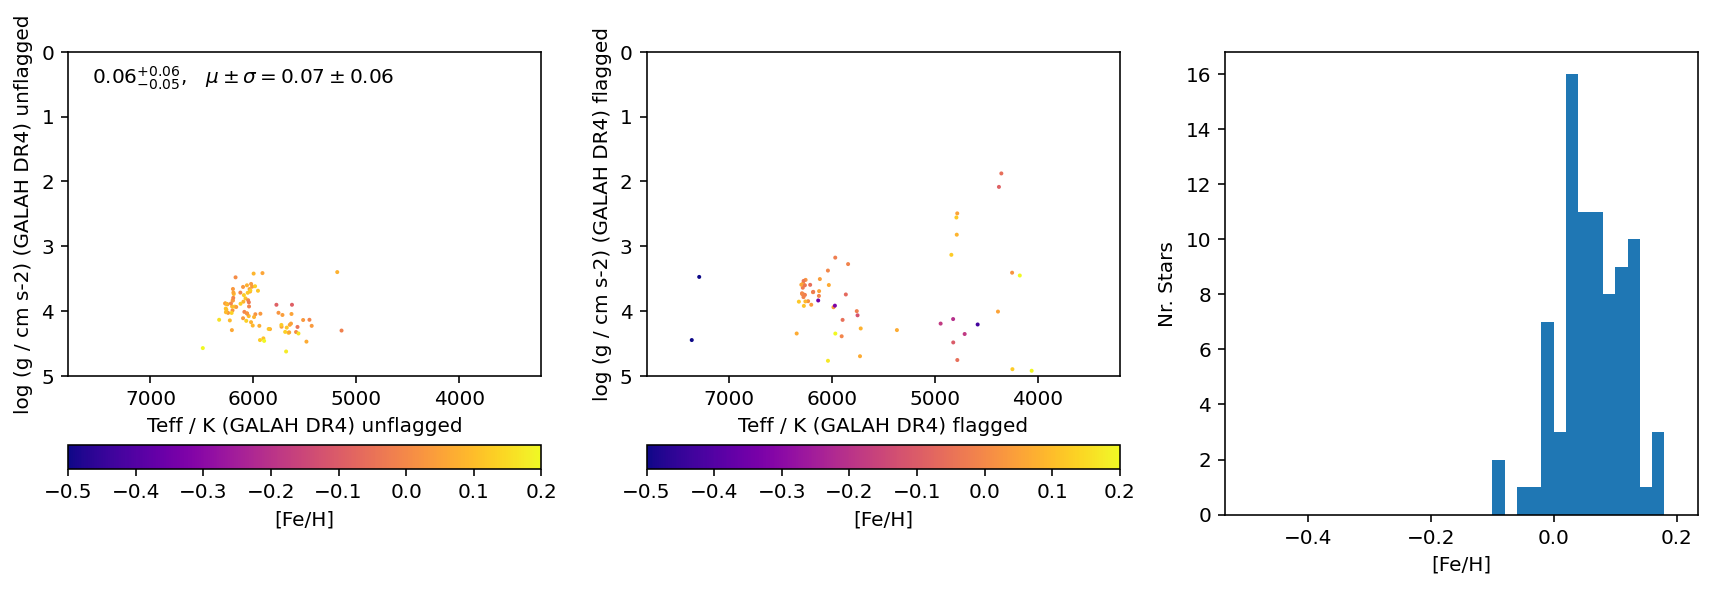

Cluster, unflagged, flagged, total
Ruprecht_91       1 4 3
Cluster, unflagged, flagged, total
Sigma_Ori         1 74 40


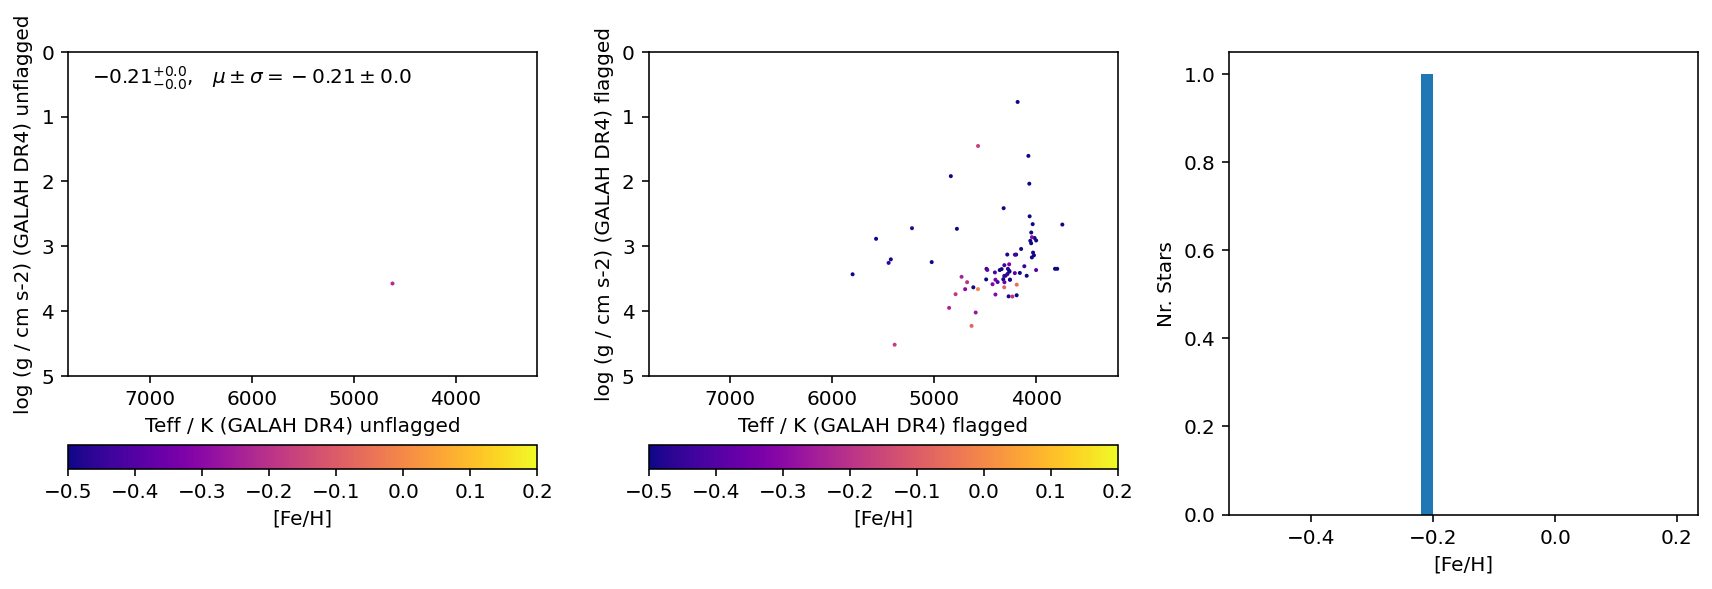

Cluster, unflagged, flagged, total
Trumpler_10       44 131 98


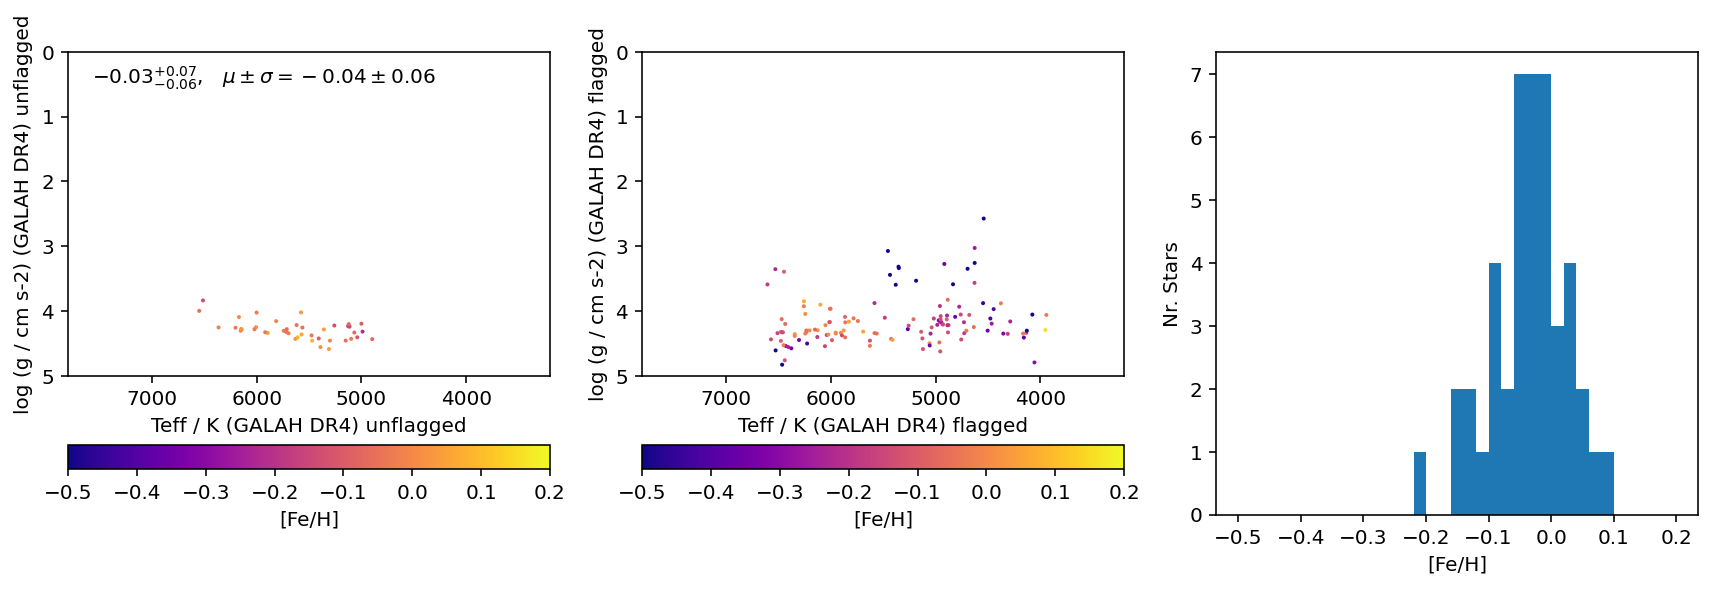

Cluster, unflagged, flagged, total
Trumpler_20       8 39 29


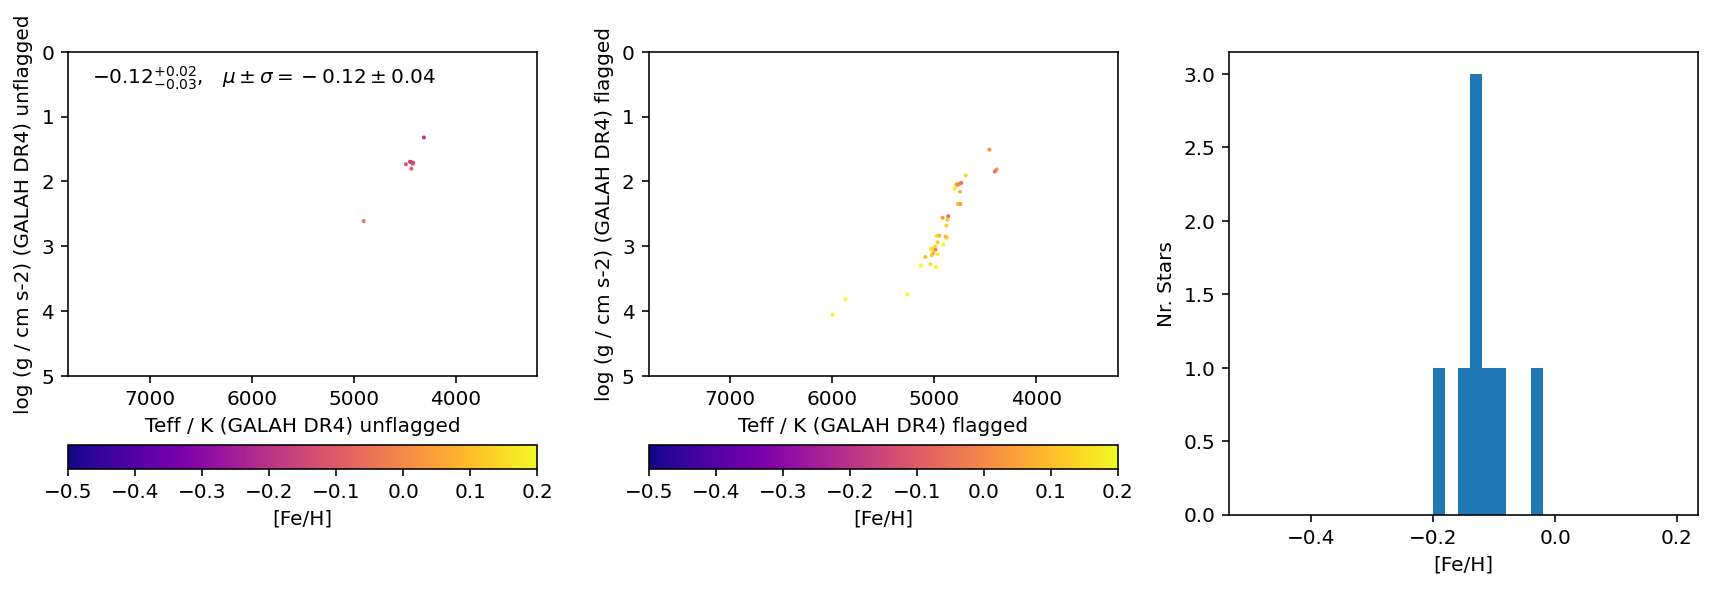

Cluster, unflagged, flagged, total
Trumpler_5        1 1 1
Cluster, unflagged, flagged, total
Turner_5          2 2 2
Cluster, unflagged, flagged, total
UBC_17a           3 178 103


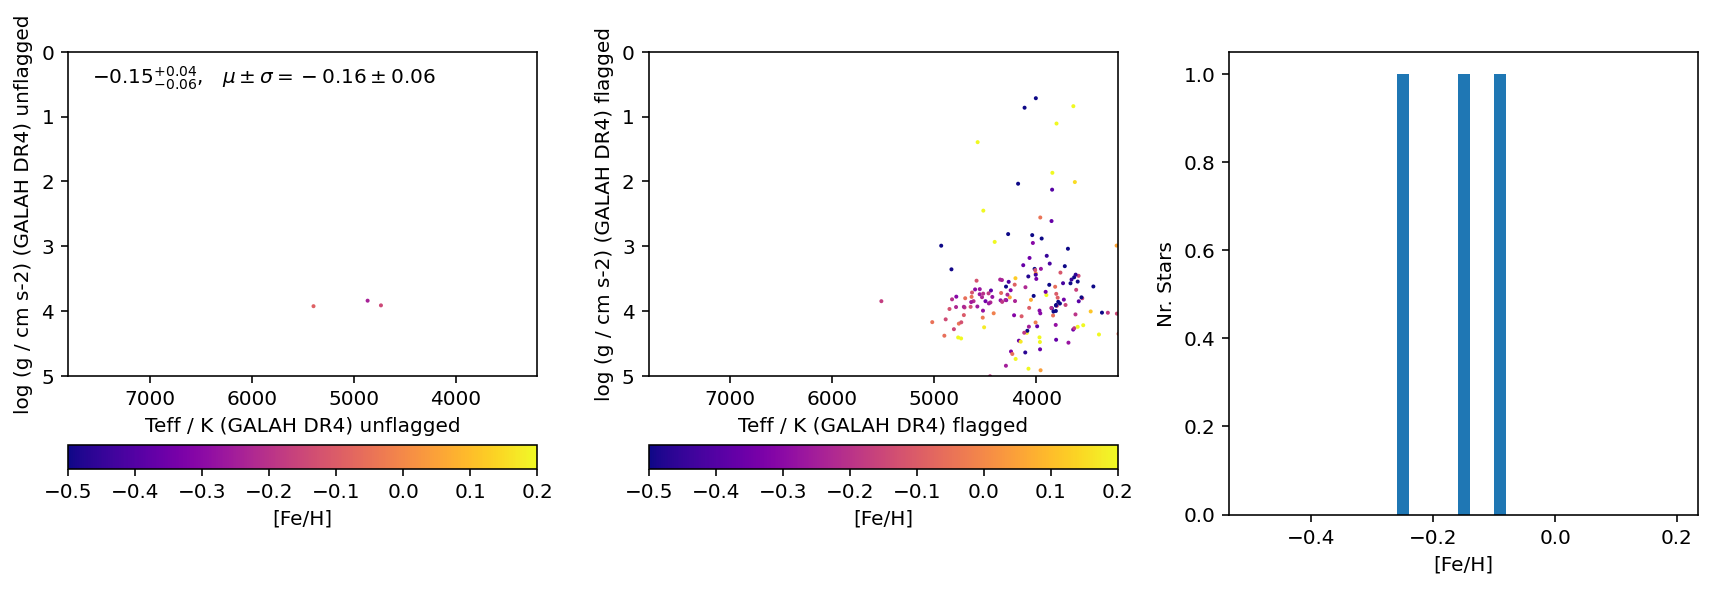

Cluster, unflagged, flagged, total
UBC_17b           2 99 60


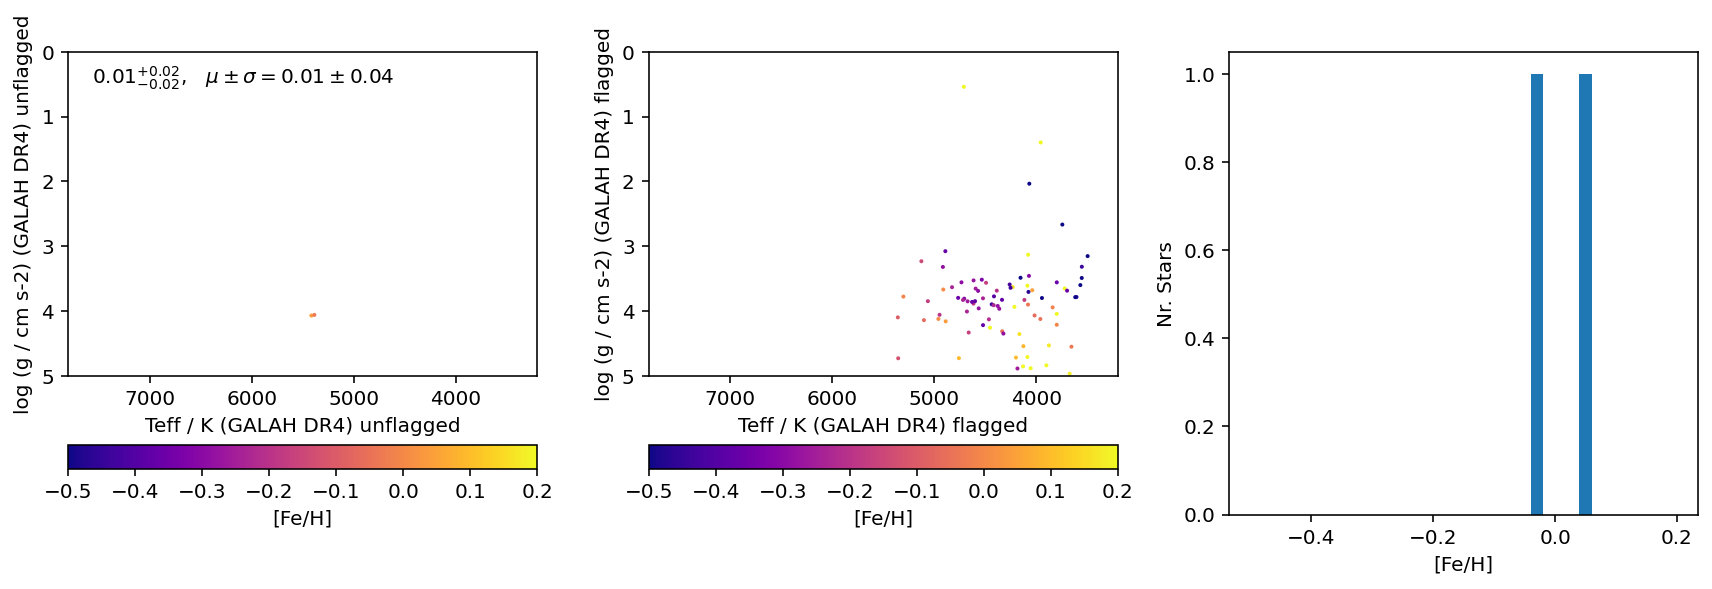

Cluster, unflagged, flagged, total
UBC_212           1 4 3
Cluster, unflagged, flagged, total
UBC_649           1 0 1
Cluster, unflagged, flagged, total
UBC_7             1 0 1
Cluster, unflagged, flagged, total
UPK_40            1 3 2
Cluster, unflagged, flagged, total
UPK_524           1 3 3
Cluster, unflagged, flagged, total
UPK_526           1 1 2
Cluster, unflagged, flagged, total
UPK_545           2 2 4
Cluster, unflagged, flagged, total
UPK_579           2 10 9
Cluster, unflagged, flagged, total
UPK_612           3 5 46


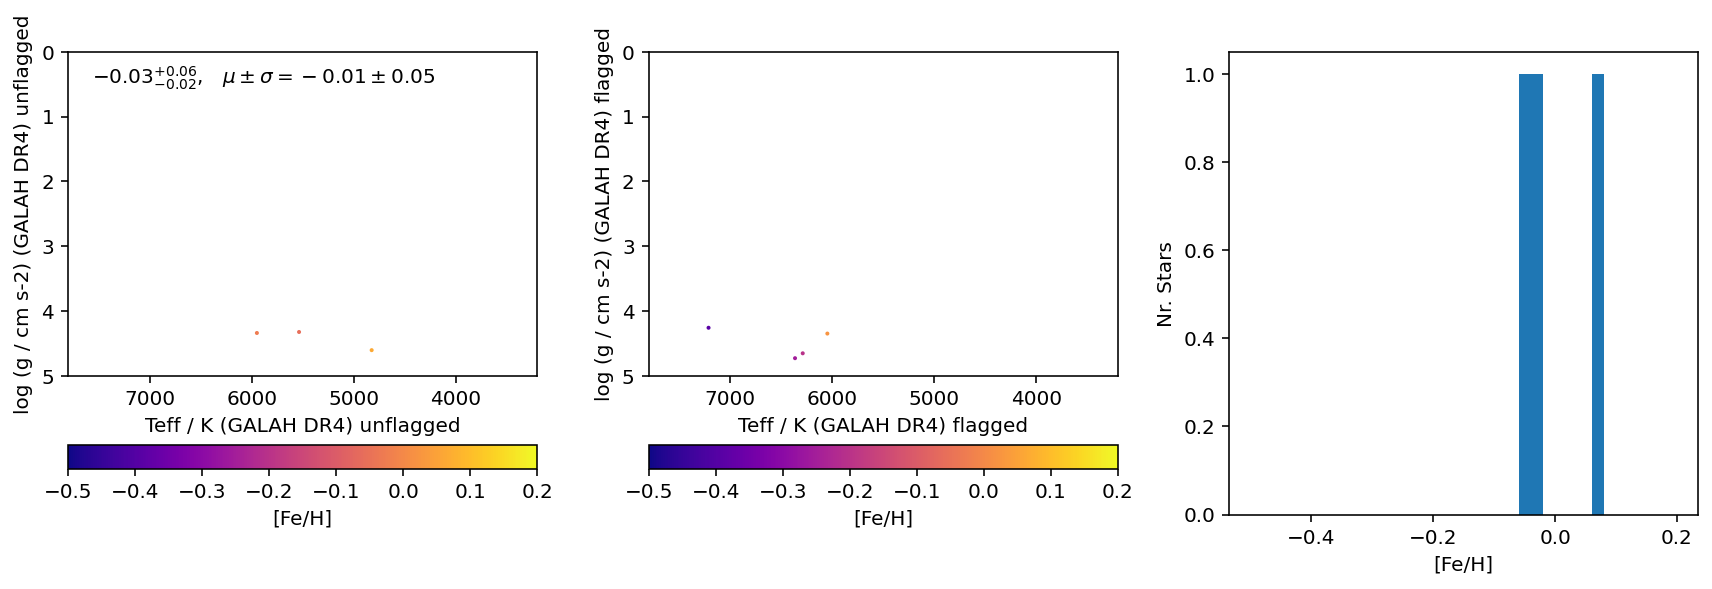

In [11]:
for each_cluster in np.unique(joined['Cluster'][unflagged]):
    
    unflagged_in_cluster = unflagged & (joined['Cluster'] == each_cluster)
    flagged_in_cluster = (~unflagged) & (joined['Cluster'] == each_cluster)
    in_cluster = (all_dr60_cluster['Cluster'] == each_cluster)
    
    print('Cluster, unflagged, flagged, total')
    print(each_cluster,len(joined['Cluster'][unflagged_in_cluster]),len(joined['Cluster'][flagged_in_cluster]),len(all_dr60_cluster['Cluster'][in_cluster]))

    if len(all_dr60_cluster['Cluster'][in_cluster]) > 10:
        f, gs = plt.subplots(1,3,figsize=(12,4))

        # First panel: GALAH DR4 unflagged
        ax = gs[0]
        ax.set_xlabel('Teff / K (GALAH DR4) unflagged')
        ax.set_ylabel('log (g / cm s-2) (GALAH DR4) unflagged')
        s = ax.scatter(
            joined['teff'][unflagged_in_cluster],
            joined['logg'][unflagged_in_cluster],
            c = joined['fe_h'][unflagged_in_cluster],
            s=1,cmap='plasma',vmin=-0.5,vmax=0.2
        )
        ax.set_xlim(7800,3200)
        ax.set_ylim(5,0)
        cbar = plt.colorbar(s, ax=ax, orientation='horizontal')
        cbar.set_label('[Fe/H]')

        element_detection = (
            unflagged #& 
            #(joined['flag_fe_h'] == 0)
        )
        percentiles = np.percentile(joined['fe_h'][unflagged_in_cluster],q=[16,50,84])
        mean = np.mean(joined['fe_h'][unflagged_in_cluster])
        sigma = np.std(joined['fe_h'][unflagged_in_cluster])
        text = r'${'+str(np.round(percentiles[1],decimals=2))+'}_{-'+str(np.round(percentiles[1]-percentiles[0],decimals=2))+'}^{+'+str(np.round(percentiles[2]-percentiles[1],decimals=2))+'}$,   $\mu\pm\sigma = '+str(np.round(mean,decimals=2))+'\pm'+str(np.round(sigma,decimals=2))+'$'
        ax.text(0.05,0.9,text,transform=ax.transAxes)

        # Second panel: GALAH DR4 flagged
        ax = gs[1]
        ax.set_xlabel('Teff / K (GALAH DR4) flagged')
        ax.set_ylabel('log (g / cm s-2) (GALAH DR4) flagged')
        ax.scatter(
            joined['teff'][flagged_in_cluster],
            joined['logg'][flagged_in_cluster],
            c = joined['fe_h'][flagged_in_cluster],
            s=1,cmap='plasma',vmin=-0.5,vmax=0.2
        )
        cbar = plt.colorbar(s, ax=ax, orientation='horizontal')
        cbar.set_label('[Fe/H]')

        ax.set_xlim(7800,3200)
        ax.set_ylim(5,0)

        # Third panel: GALAH DR4 [Fe/H]
        ax = gs[2]
        ax.set_xlabel('[Fe/H]')
        ax.set_ylabel('Nr. Stars')
        ax.hist(
            joined['fe_h'][unflagged_in_cluster],
            bins = np.linspace(-0.5,0.2,36)
        )

        plt.tight_layout()
        plt.show()
        plt.close()

(4.7, 2.5)

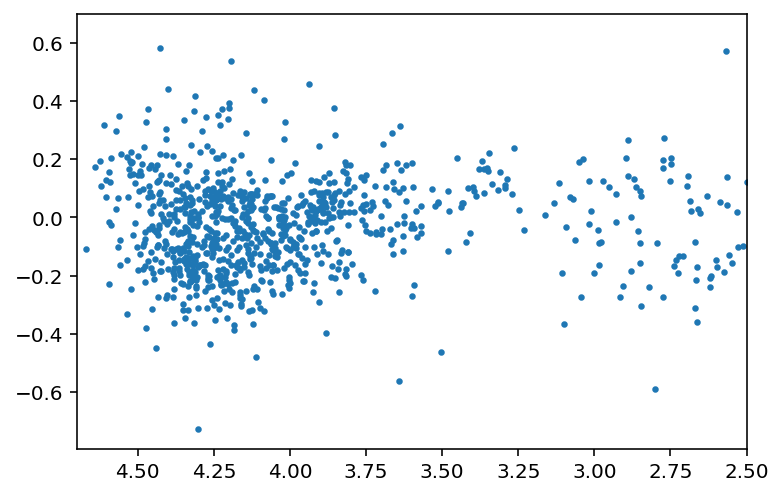

In [12]:
element = 'Al'
element_detection = (
    unflagged & 
    (joined['flag_fe_h'] == 0) & 
    (joined['flag_'+element.lower()+'_fe'] == 0)
)
plt.scatter(
    joined['logg'][element_detection],
    joined[element.lower()+'_fe'][element_detection] + joined['fe_h'][element_detection],
    s=5
)
plt.xlim(4.7,2.5)

In [13]:
def plot_comparison_xfe(joined, element = 'C', name_literature = 'GALAH DR3'):
    f, gs = plt.subplots(1,2,figsize=(7,3),sharex=True,sharey=True)
    
    element_detection = (
        unflagged & 
        (joined['flag_fe_h'] == 0) & 
        (joined['flag_'+element.lower()+'_fe'] == 0)
    )
    element_upper_limit = (
        unflagged & 
        (joined['flag_fe_h'] == 0) & 
        (joined['flag_'+element.lower()+'_fe'] == 1)
    )
    
    # First panel: GALAH DR4 [Fe/H] vs. [X/Fe]
    ax = gs[0]
    ax.set_xlabel('[Fe/H] (GALAH DR4)')
    ax.set_ylabel('['+element+'/Fe] (GALAH DR4) Detection')
    if len(joined['fe_h'][element_detection]) > 5:
        ax.scatter(
            joined['fe_h'][element_detection],
            joined[element.lower()+'_fe'][element_detection],
            s=1
        )

        percentiles = np.percentile(joined[element.lower()+'_fe'][element_detection],q=[16,50,84])
        mean = np.mean(joined[element.lower()+'_fe'][element_detection])
        sigma = np.std(joined[element.lower()+'_fe'][element_detection])
        text = r'${'+str(np.round(percentiles[1],decimals=2))+'}_{-'+str(np.round(percentiles[1]-percentiles[0],decimals=2))+'}^{+'+str(np.round(percentiles[2]-percentiles[1],decimals=2))+'}$,   $\mu\pm\sigma = '+str(np.round(mean,decimals=2))+'\pm'+str(np.round(sigma,decimals=2))+'$'
        ax.text(0.05,0.1,text,transform=ax.transAxes)

    # First panel: GALAH DR4 [Fe/H] vs. [X/Fe]
    ax = gs[1]
    ax.set_xlabel('[Fe/H] (GALAH DR4)')
    ax.set_ylabel('['+element+'/Fe] (GALAH DR4) Upper Limit')
    if len(joined['fe_h'][element_upper_limit]) > 5:
        ax.scatter(
            joined['fe_h'][element_upper_limit],
            joined[element.lower()+'_fe'][element_upper_limit],
            s=1
        )
    
    plt.tight_layout()
    plt.show()
    plt.close()

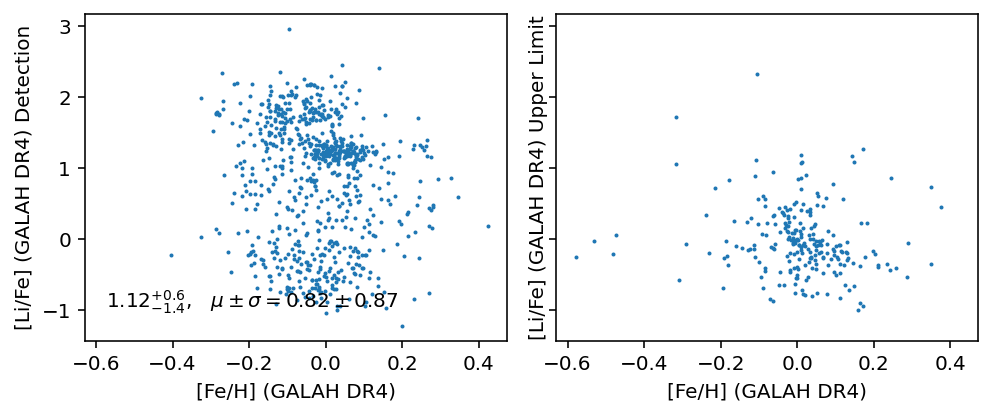

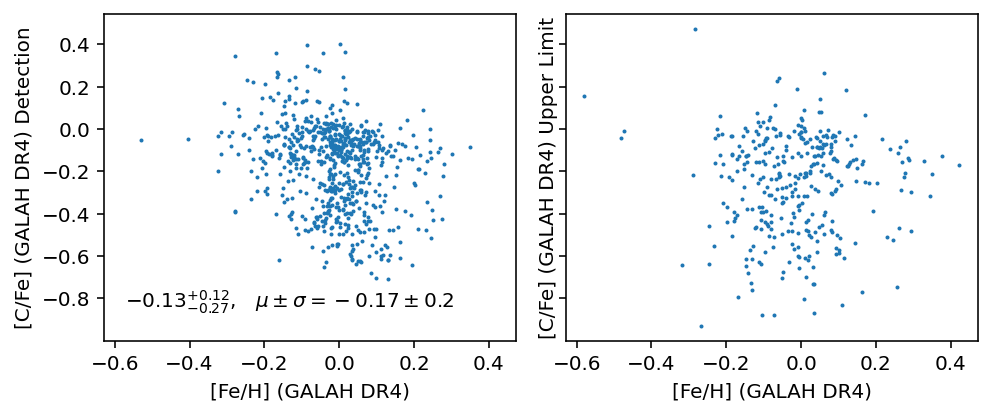

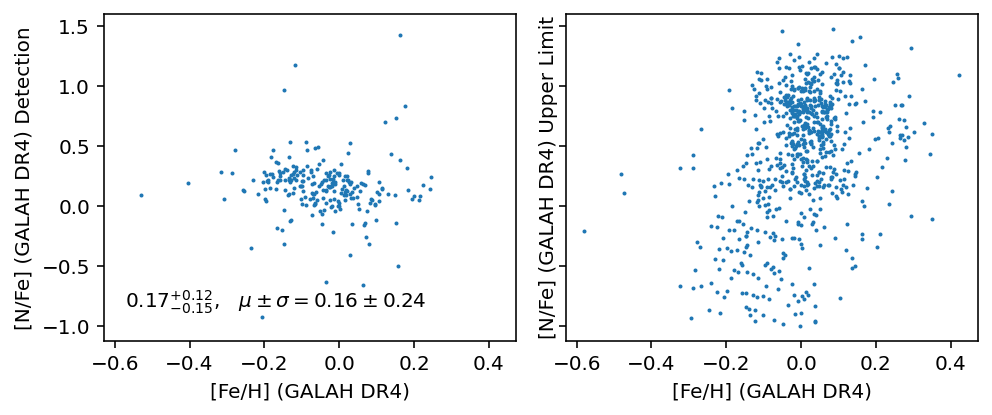

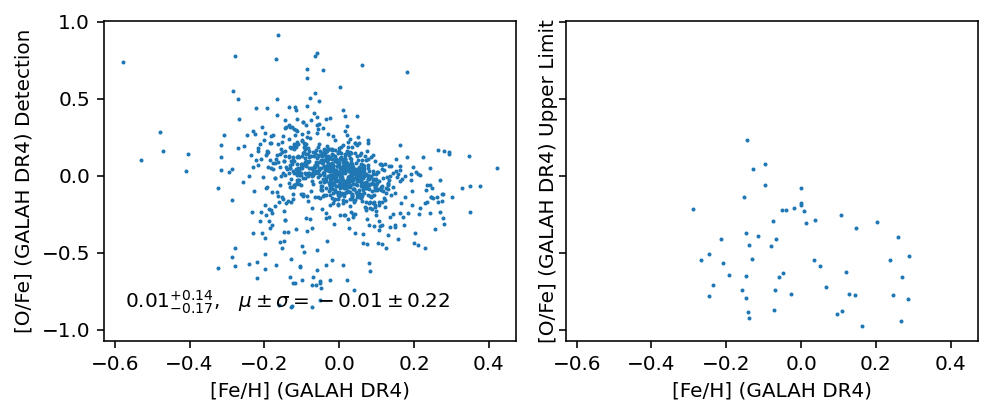

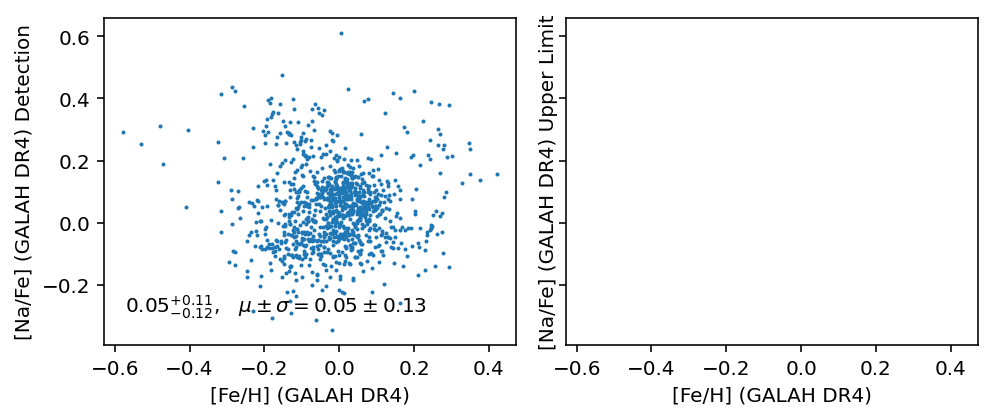

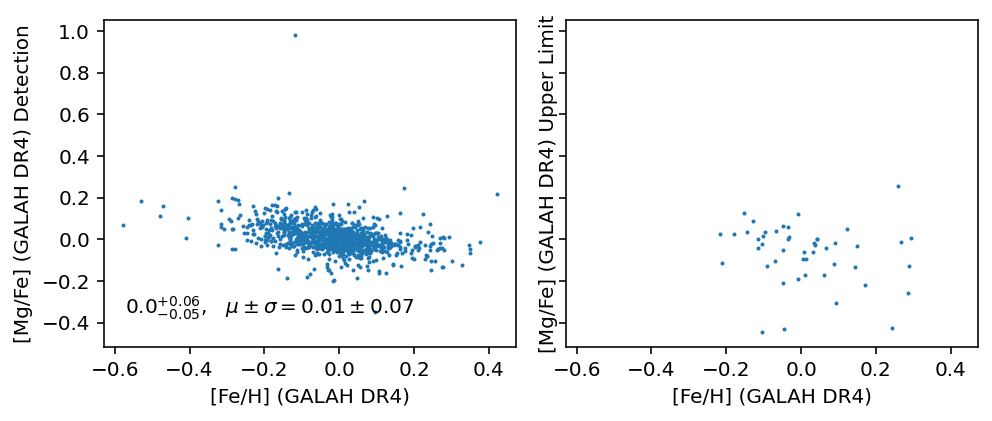

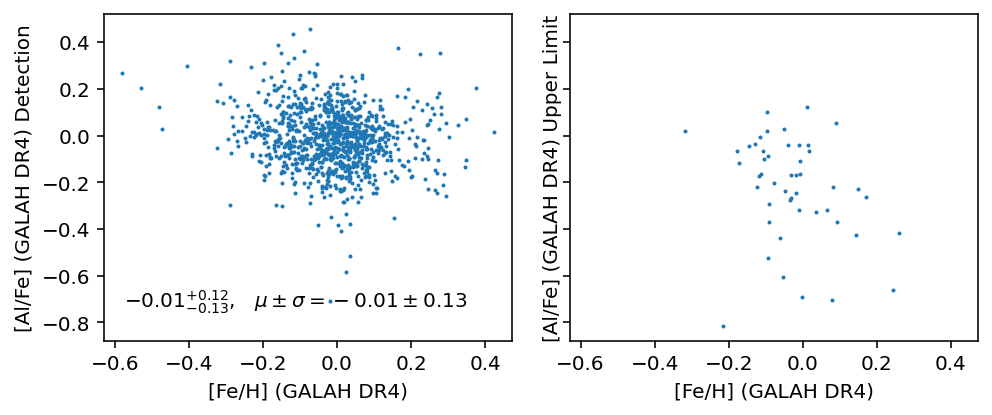

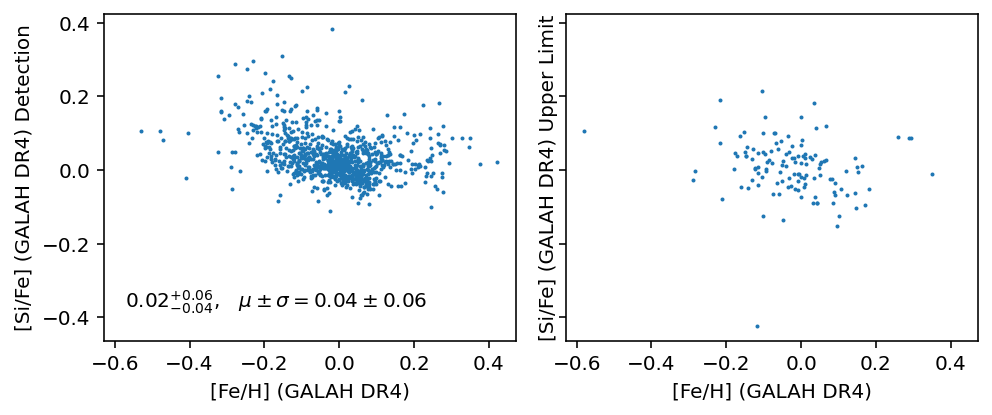

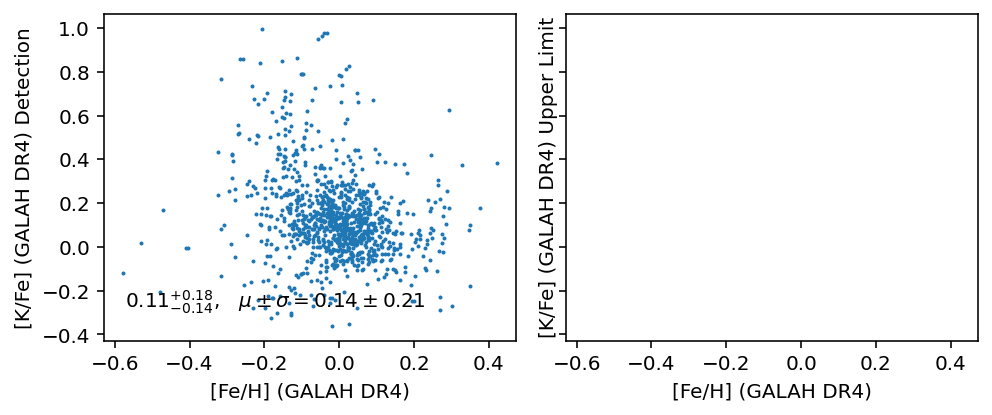

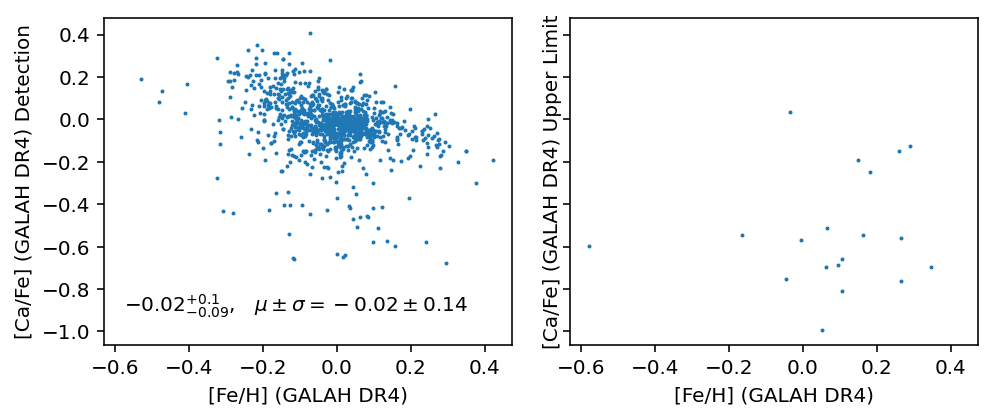

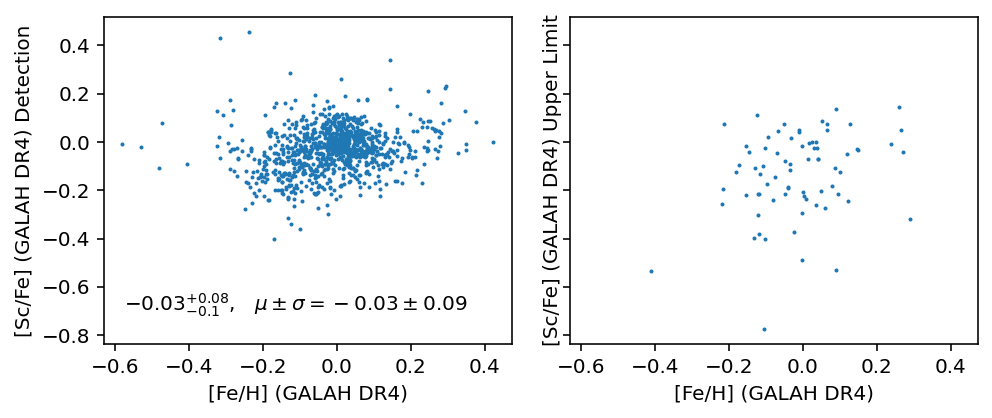

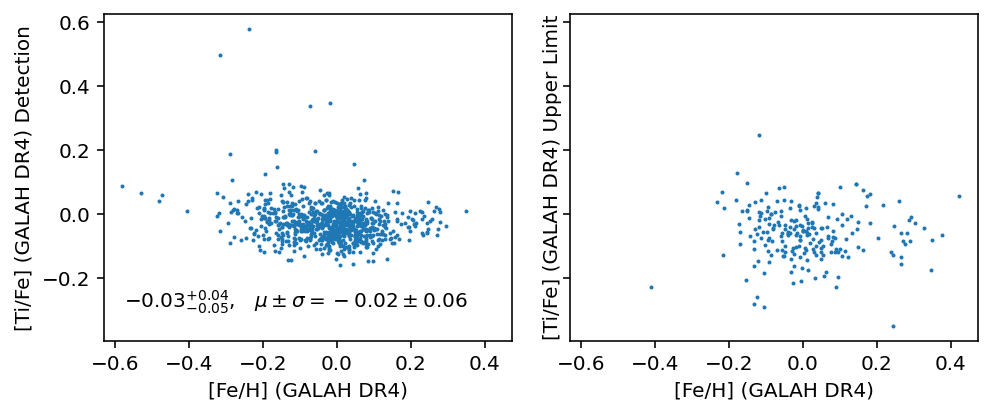

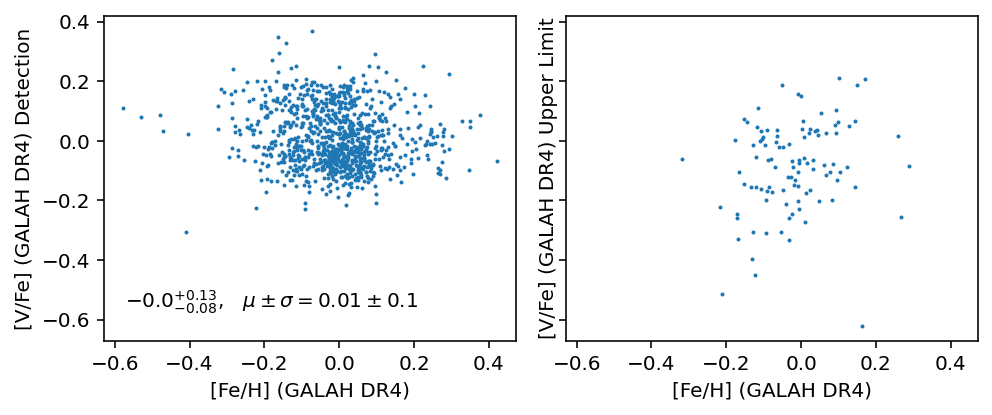

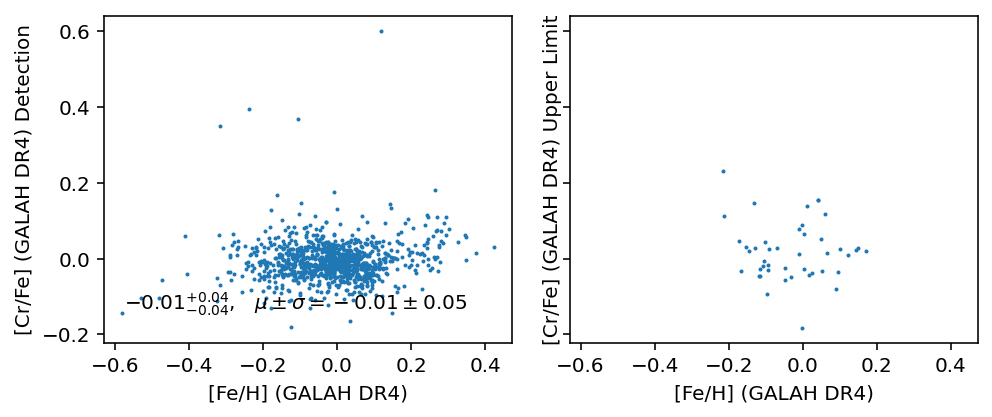

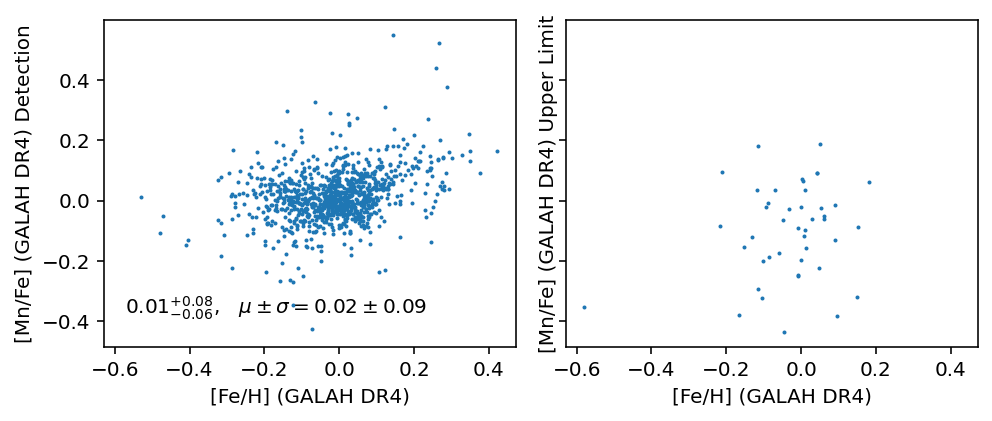

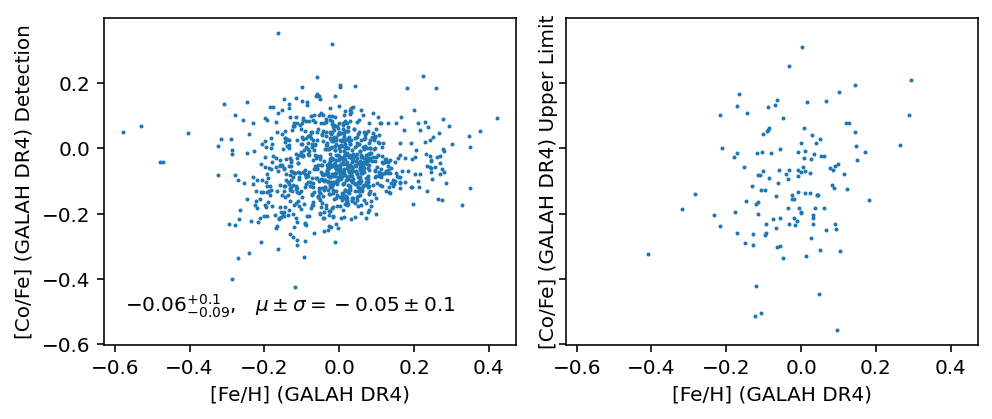

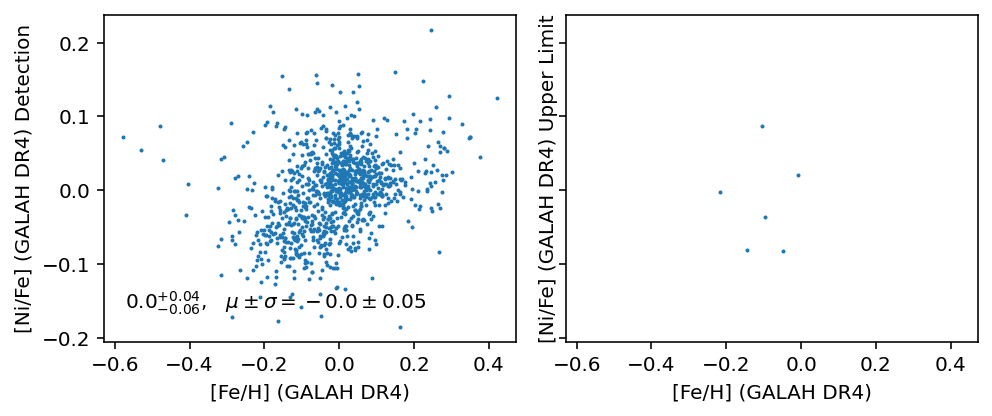

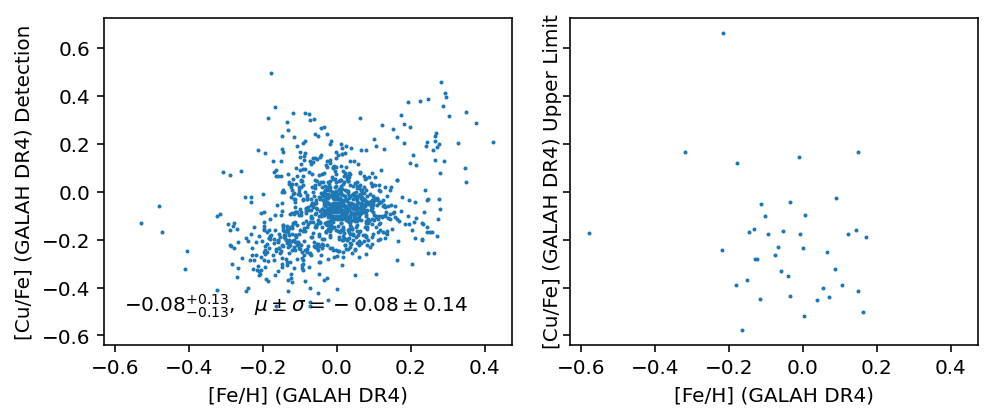

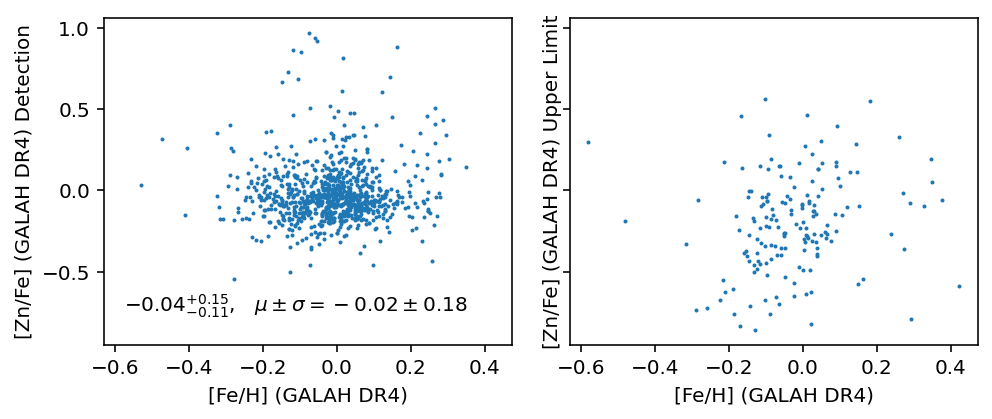

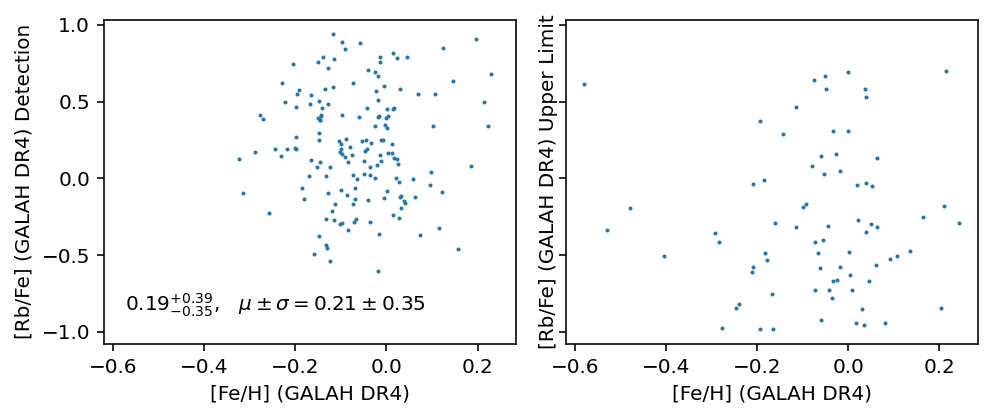

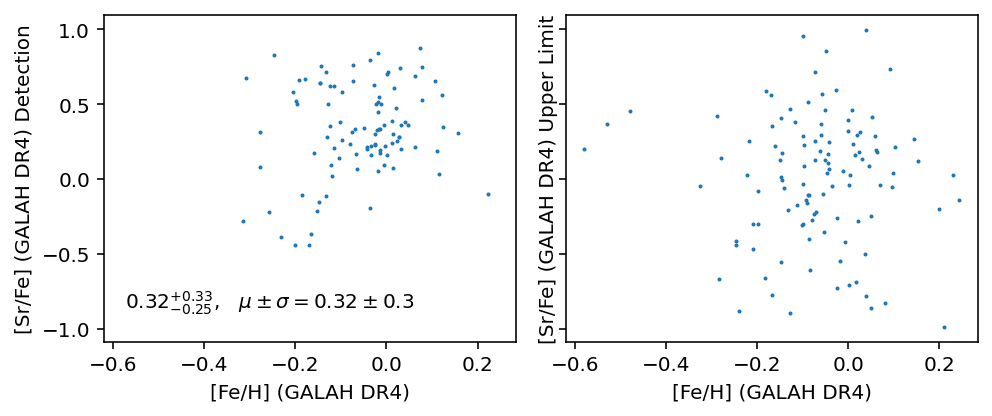

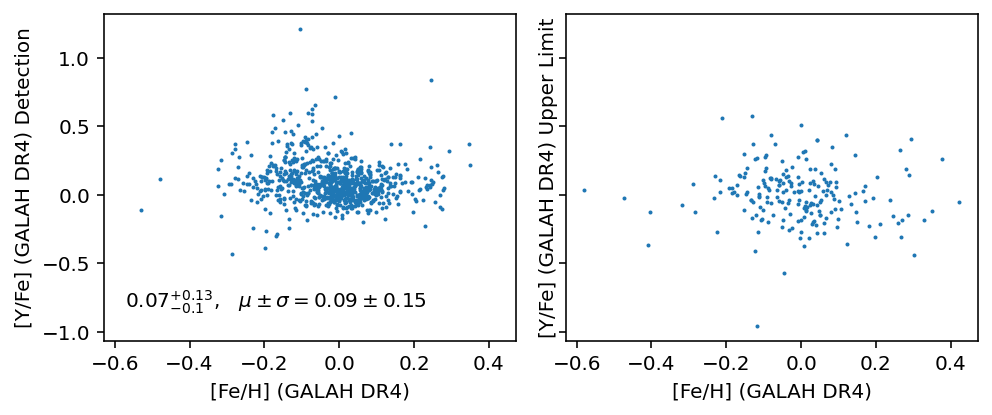

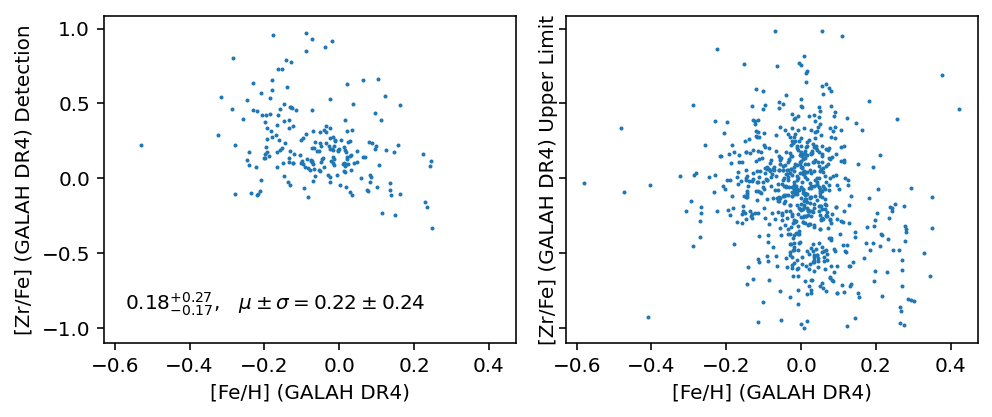

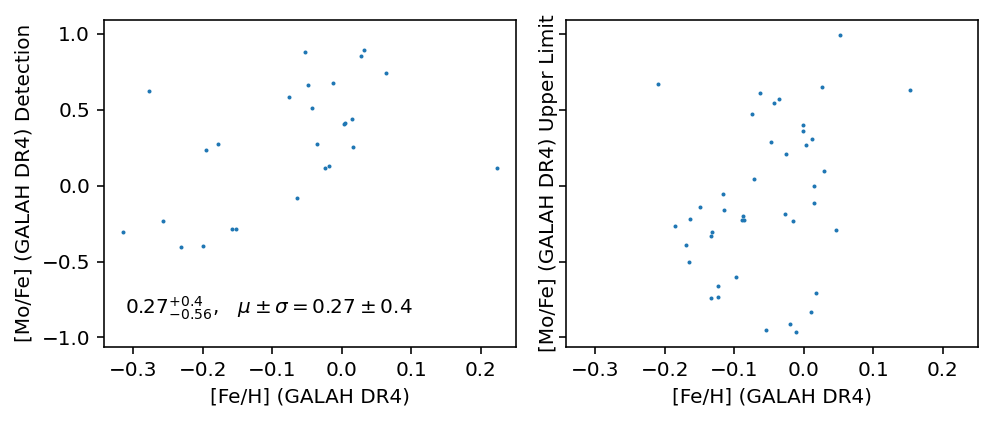

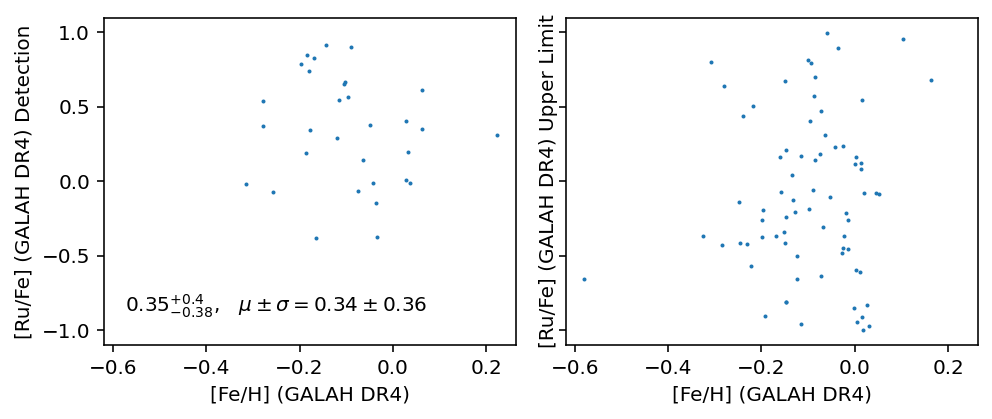

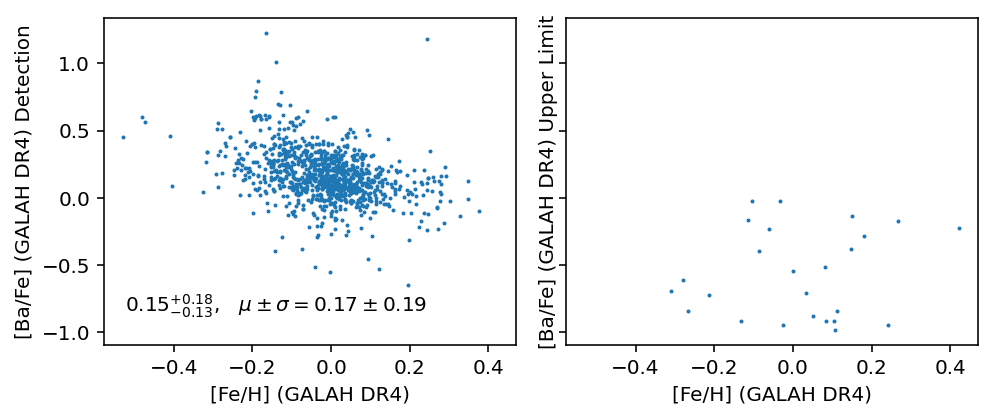

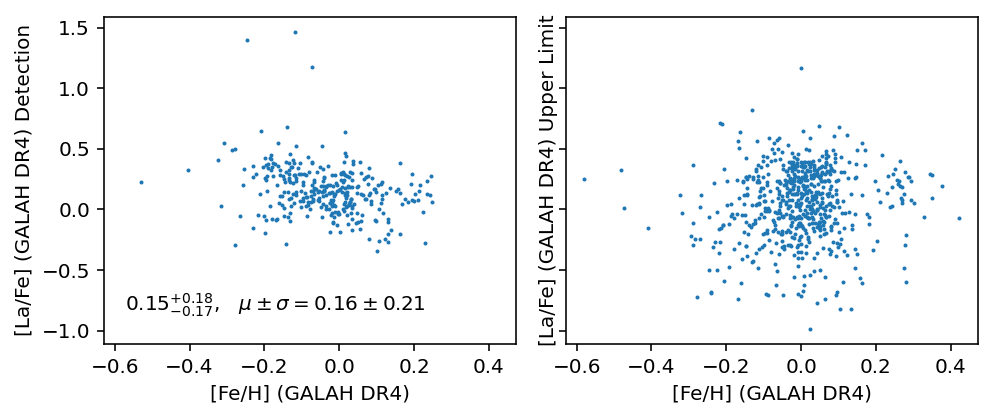

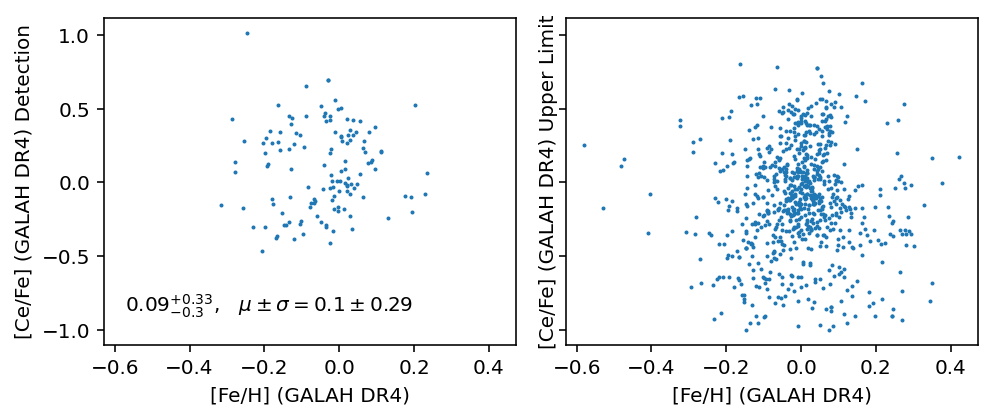

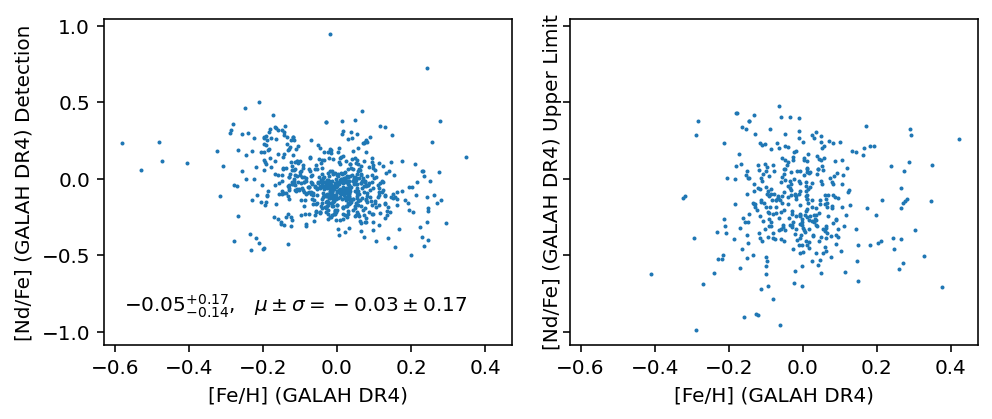

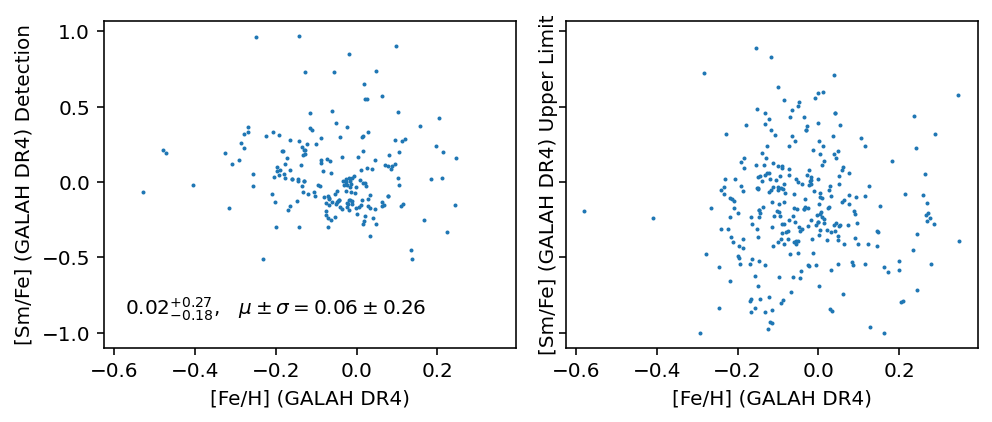

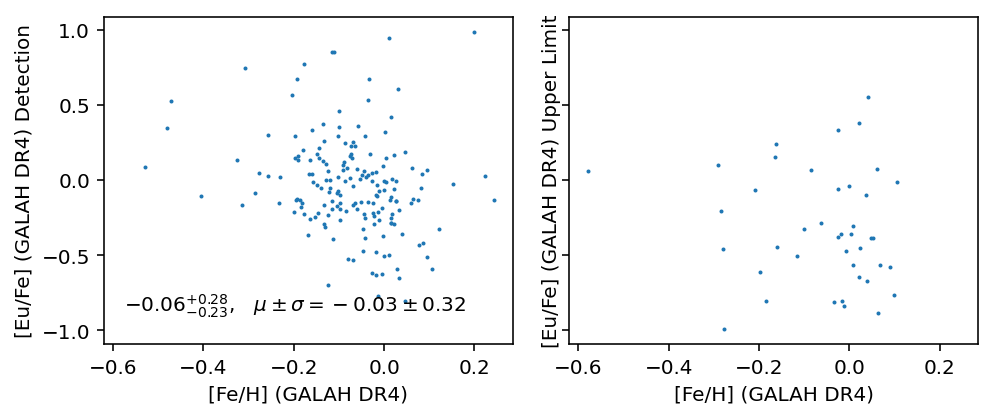

In [14]:
for element in ['Li','C','N','O','Na','Mg','Al','Si','K','Ca','Sc','Ti','V','Cr','Mn','Co','Ni','Cu','Zn','Rb','Sr','Y','Zr','Mo','Ru','Ba','La','Ce','Nd','Sm','Eu']:
    plot_comparison_xfe(joined, element = element)